# House price prediction regression project

# Project Goal

# Load liraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
train_dataset_path='train.csv'
test_dataset_path='test.csv'

df_train=pd.read_csv(train_dataset_path)
df_test=pd.read_csv(test_dataset_path)

print('shape of df_train:',df_train.shape)
print('shape of df_test:',df_test.shape)

shape of df_train: (1460, 81)
shape of df_test: (1459, 80)


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Intregation

In [6]:
df=pd.concat([df_train,df_test])
print('Shape of intregated df:',df.shape)

Shape of intregated df: (2919, 81)


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Get the brief information of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
int_features=df.select_dtypes(include=['int64']).columns
print('The number of integer features:',int_features.shape[0])
print('Integer features names:',int_features.tolist())

The number of integer features: 26
Integer features names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features=df.select_dtypes(include=['float64']).columns
print('The number of floating features:',float_features.shape[0])
print('Floating features names:',float_features.tolist())

The number of floating features: 12
Floating features names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
catgorical_features=df.select_dtypes(include=['object']).columns
print('The number of catgorical features:',catgorical_features.shape[0])
print('catgorical features names:',catgorical_features.tolist())

The number of catgorical features: 43
catgorical features names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Get the statistical information of numerical formulas

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Handling missing value

# Visulise Missing / null value

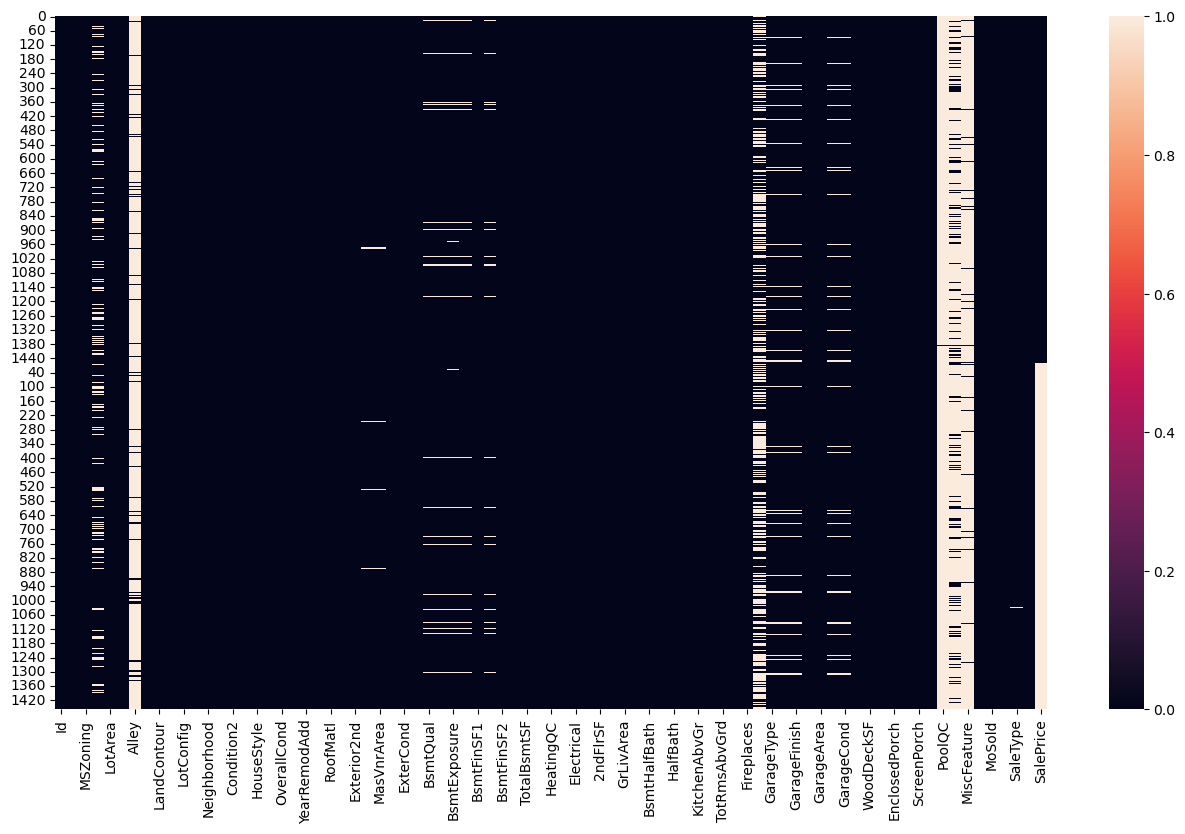

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig('EDA_img/heatmap_df_null_value.png')

# Get the null value parcentage for every features

In [15]:
#Set index as ID columns
df=df.set_index('Id')

In [16]:
null_count=df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [17]:
null_parcent=df.isnull().sum()/df.shape[0]*100
null_parcent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

# Drop columns/Features

In [18]:
'''As per domain knowledge we will not drop those features. Insted Null value we will constant value'NA' '''
miss_value_50_parcent=null_parcent[(null_parcent>50)]
miss_value_50_parcent

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [19]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [20]:
'''As per domain knowledge we will not drop those features. Insted Null value we will constant value'NA' '''
miss_value_20_50_parcent=null_parcent[(null_parcent>20)&(null_parcent<50)]
miss_value_50_parcent

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [21]:
miss_value_5_20_parcent=null_parcent[(null_parcent>5)&(null_parcent<20)]
miss_value_5_20_parcent

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<AxesSubplot:ylabel='Id'>

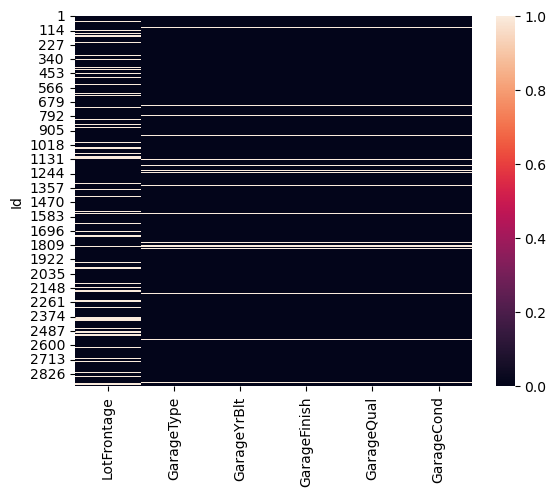

In [22]:
sns.heatmap(df[miss_value_5_20_parcent.keys()].isnull())

# Missing value imputation

In [23]:
missing_value_features=null_parcent[null_parcent>0]
print('Total missing value features:',len(missing_value_features))

Total missing value features: 35


In [24]:
missing_value_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [25]:
missing_value_features.keys().isin(catgorical_features)

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False])

In [26]:
cat_missing_value_features=missing_value_features[missing_value_features.keys().isin(catgorical_features)]
print('Total catgorical missing value features:',len(cat_missing_value_features))
cat_missing_value_features

Total catgorical missing value features: 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [27]:
missing_value_features.keys().isin(int_features)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [28]:
int_missing_value_features=missing_value_features[missing_value_features.keys().isin(int_features)]
print('Total integer missing value features:',len(int_missing_value_features))
int_missing_value_features

Total integer missing value features: 0


Series([], dtype: float64)

In [29]:
missing_value_features.keys().isin(float_features)

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True])

In [30]:
float_missing_value_features=missing_value_features[missing_value_features.keys().isin(float_features)]
print('Total float missing value features:',len(float_missing_value_features))
float_missing_value_features

Total float missing value features: 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

# Handling MSZoning Featuer (0.137033)

In [31]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

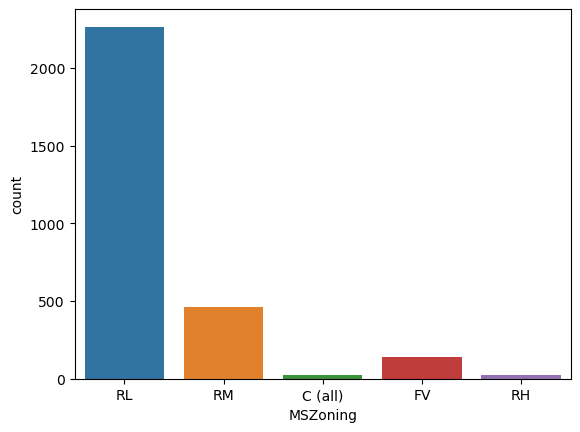

In [32]:
sns.countplot(df['MSZoning'])

In [33]:
#Backup for original dataset
df_miss_value_impute=df.copy()
df_miss_value_impute.shape

(2919, 80)

In [34]:
mszoning_mode=df['MSZoning'].mode()[0]
df_miss_value_impute['MSZoning'].replace(np.nan,mszoning_mode,inplace=True)
df_miss_value_impute['MSZoning'].isnull().sum()

0

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

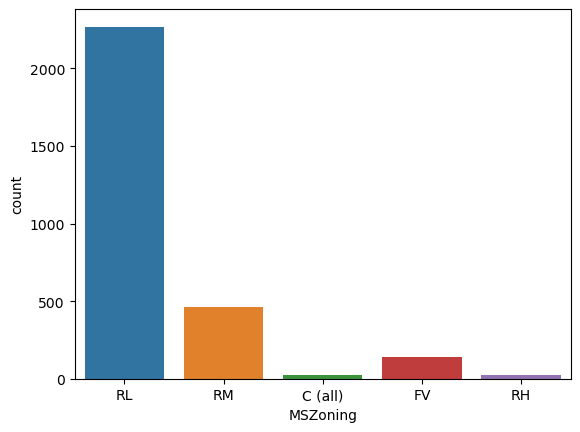

In [35]:
sns.countplot(df_miss_value_impute['MSZoning'])

In [36]:
def old_new_count_plot(df,df_new,features,figsize=(16,6)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.countplot(df[features])
    plt.title('old data distribusion')
    plt.subplot(122)
    sns.countplot(df_new[features])
    plt.title('New data distribusion')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


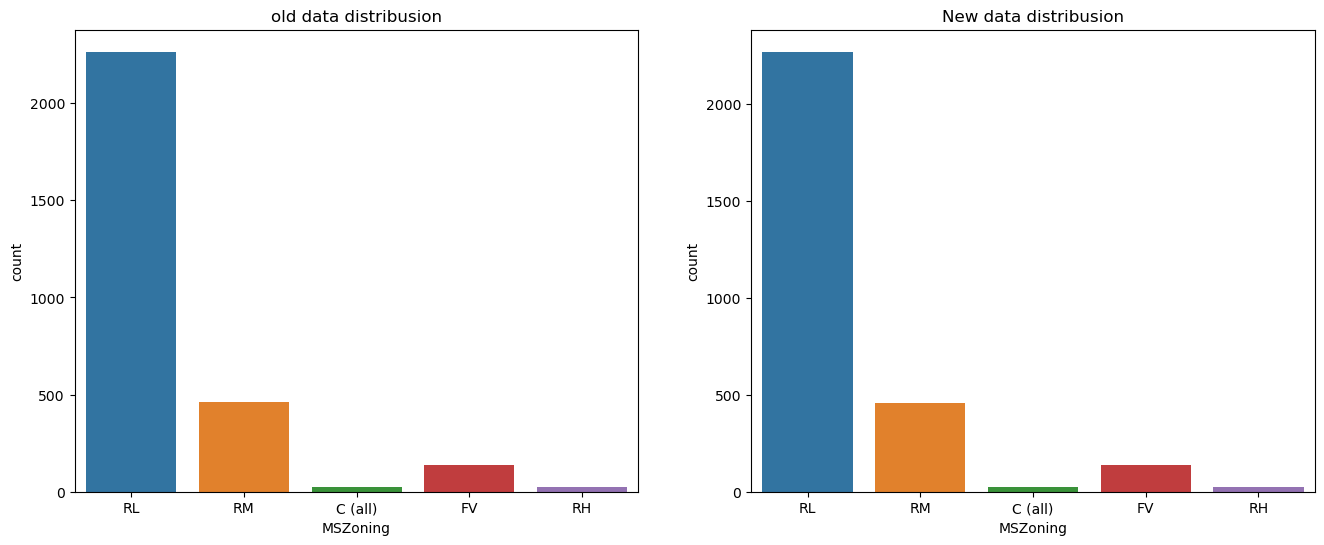

In [37]:
old_new_count_plot(df,df_miss_value_impute,'MSZoning')

# Handling Alley Featuer (93.216855)

In [38]:
df_miss_value_impute['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [39]:
new_alley_value='NA'
df_miss_value_impute['Alley'].replace(np.nan,new_alley_value,inplace=True)
df_miss_value_impute['Alley'].isnull().sum()

0

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


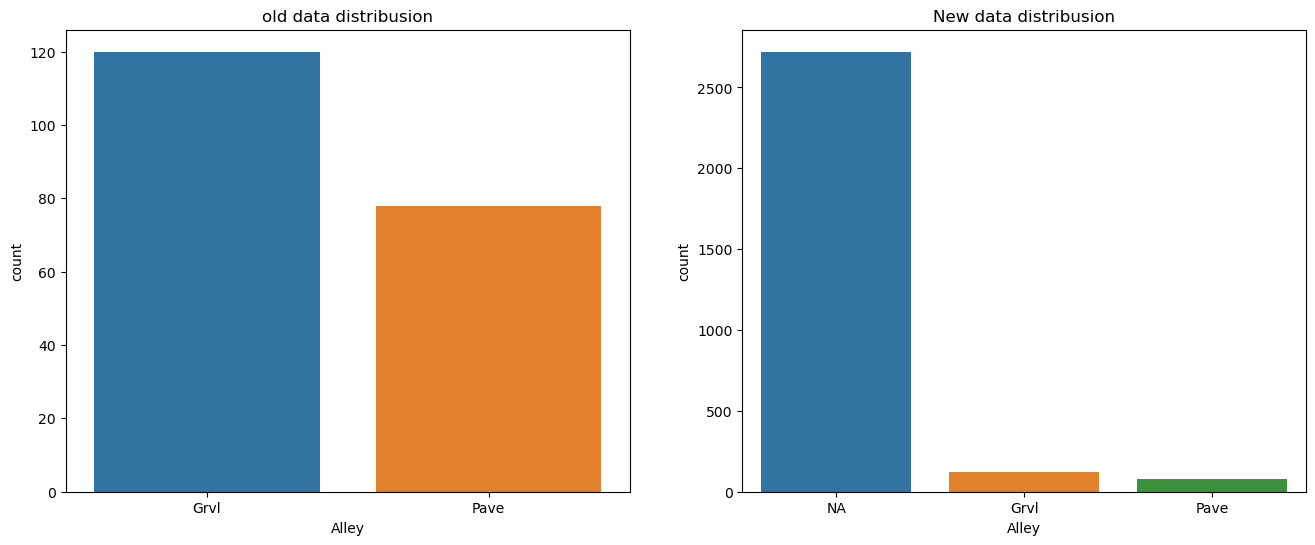

In [40]:
old_new_count_plot(df,df_miss_value_impute,'Alley')

# Handling LotFrontage features  (16.649538)

In [41]:
def box_dist_plot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


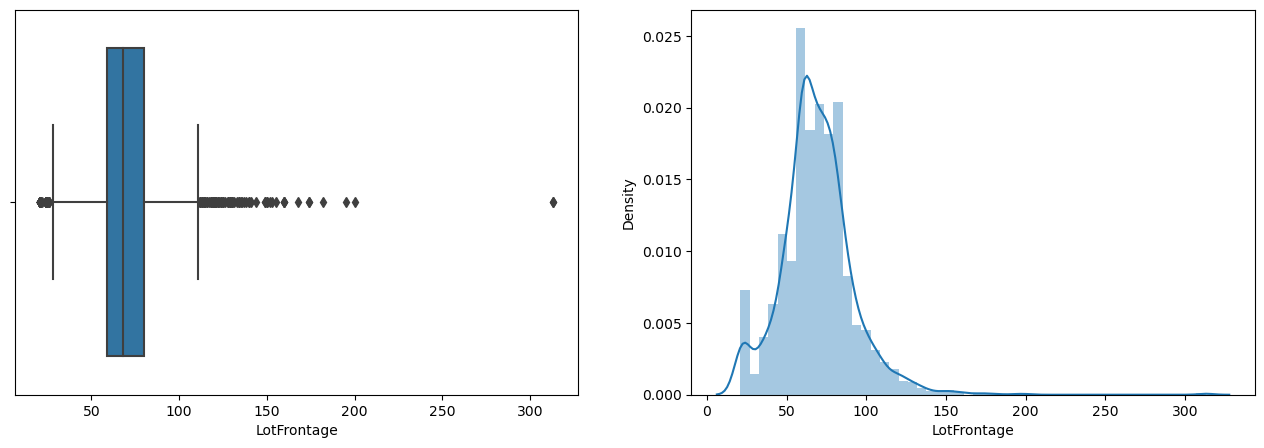

In [42]:
box_dist_plot(df['LotFrontage'])

In [43]:
lotfrontage_mean=df['LotFrontage'].mean()
df_miss_value_impute['LotFrontage'].replace(np.nan,lotfrontage_mean,inplace=True)
df_miss_value_impute['LotFrontage'].isnull().sum()

0

In [44]:
def old_new_box_dist_plot(df,df_new,features, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[features])
    plt.title('old data distribusion with boxplot')
    plt.subplot(222)
    sns.boxplot(df_new[features])
    plt.title('New data distribusion boxplot')
    
    plt.subplot(223)
    sns.distplot(df[features])
    plt.title('Old data distribusion distplot')
    plt.subplot(224)
    sns.distplot(df_new[features])
    plt.title('New data distribusion distplot')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:

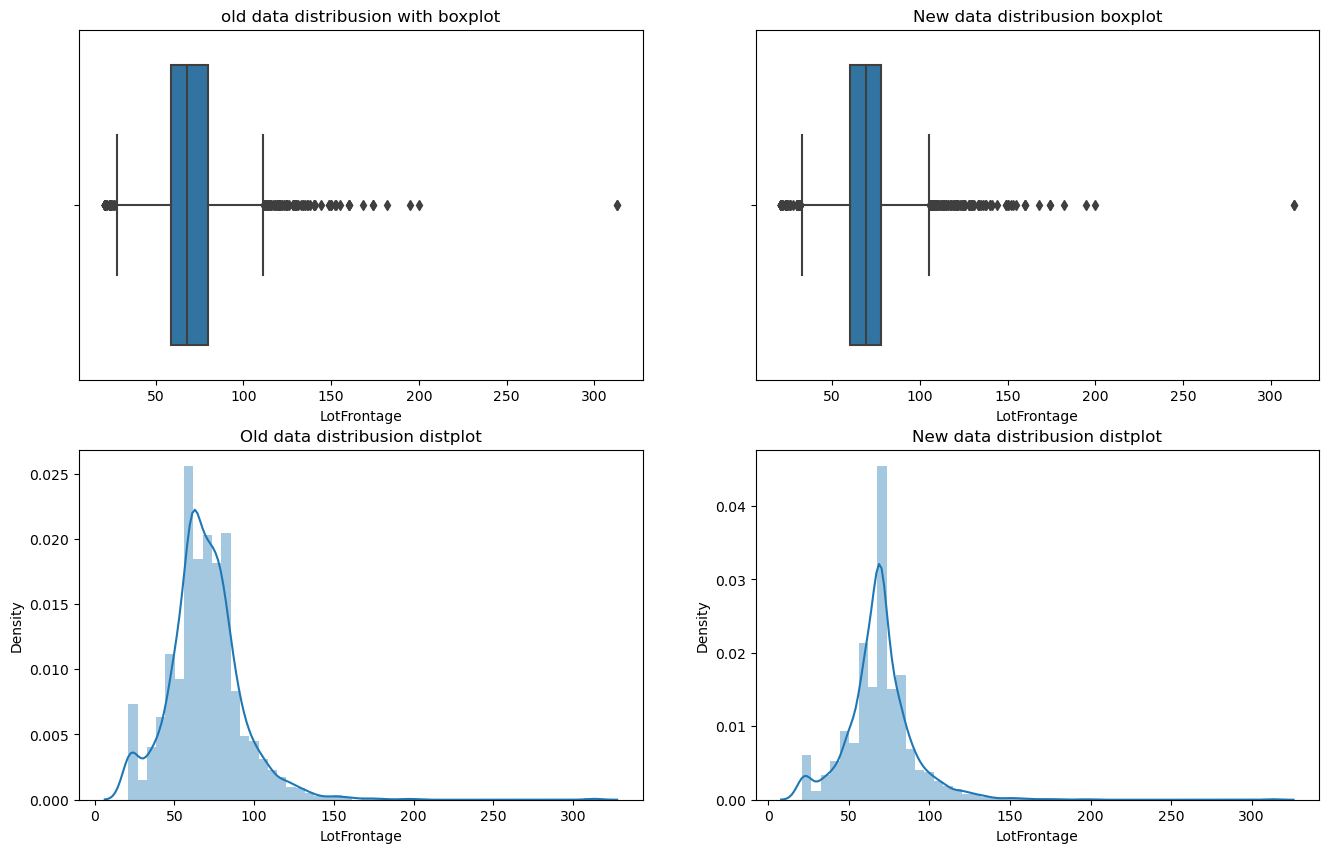

In [45]:
old_new_box_dist_plot(df,df_miss_value_impute,'LotFrontage')

# Handling Utilities features (0.068517)

In [46]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
utilities_mode=df_miss_value_impute['Utilities'].mode()[0]
df_miss_value_impute['Utilities'].replace(np.nan,utilities_mode,inplace=True)
df_miss_value_impute['Utilities'].isnull().sum()

0

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


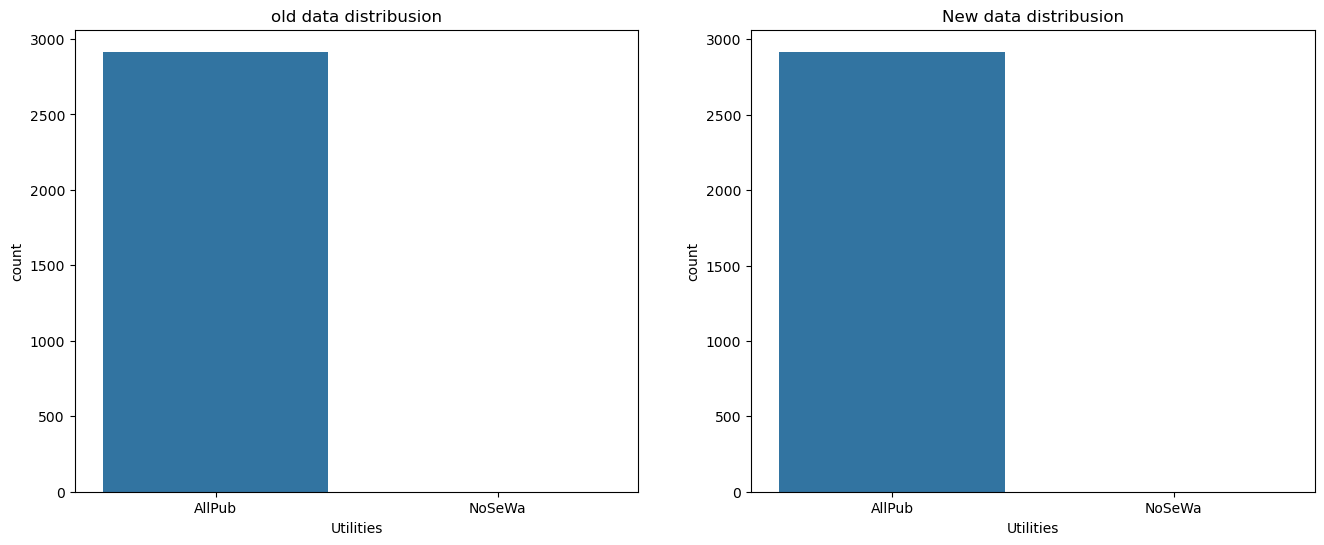

In [48]:
old_new_count_plot(df,df_miss_value_impute,'Utilities')

# Handling Exterior1st  (90.034258) and Exterior2nd  (0.034258) feature

In [49]:
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [50]:
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [51]:
exterior1st_mode=df_miss_value_impute['Exterior1st'].mode()[0]
df_miss_value_impute['Exterior1st'].replace(np.nan,exterior1st_mode,inplace=True)
df_miss_value_impute['Exterior1st'].isnull().sum()

0

In [52]:
exterior2nd_mode=df_miss_value_impute['Exterior2nd'].mode()[0]
df_miss_value_impute['Exterior2nd'].replace(np.nan,exterior2nd_mode,inplace=True)
df_miss_value_impute['Exterior2nd'].isnull().sum()

0

# Handling MasVnrType (0.822199) and MasVnrArea (0.7879410 feature

<AxesSubplot:ylabel='Id'>

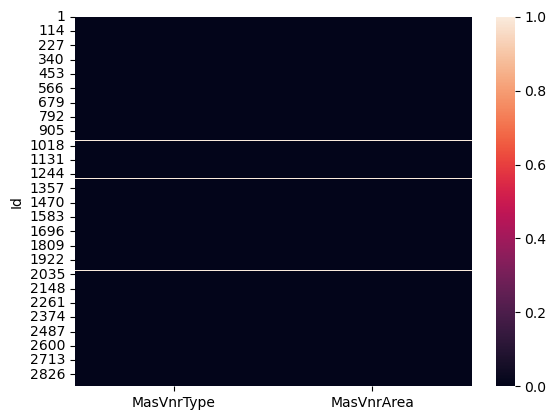

In [53]:
sns.heatmap(df[['MasVnrType','MasVnrArea']].isnull())

In [54]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [55]:
masvnrtype_mode=df_miss_value_impute['MasVnrType'].mode()[0]
df_miss_value_impute['MasVnrType'].replace(np.nan,masvnrtype_mode,inplace=True)
df_miss_value_impute['MasVnrType'].isnull().sum()

0

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


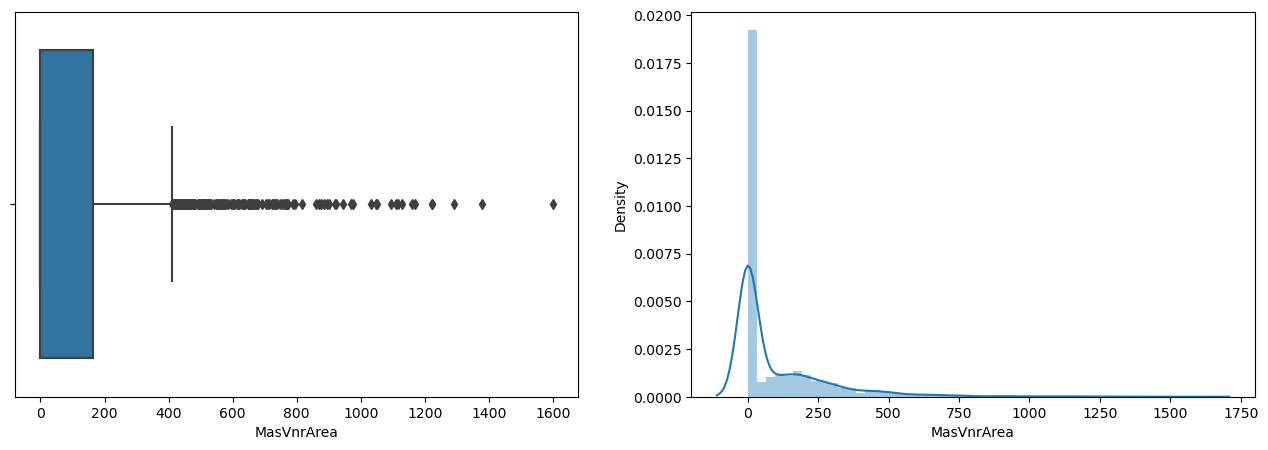

In [56]:
box_dist_plot(df['MasVnrArea'])

In [57]:
masvnrArea_zero=0
df_miss_value_impute['MasVnrArea'].replace(np.nan,masvnrArea_zero,inplace=True)
df_miss_value_impute['MasVnrArea'].isnull().sum()

0

# Handling  Bsmt Features

In [58]:
cat_bsmt_feat=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

num_bsmt_feat=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

<AxesSubplot:ylabel='Id'>

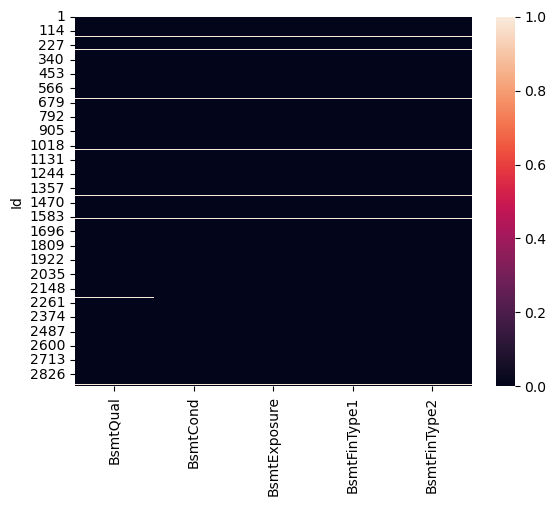

In [59]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [60]:
for feat in cat_bsmt_feat:
    print(f'Value count of {feat}:{df[feat].value_counts()}')

Value count of BsmtQual:TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond:TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure:No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1:Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2:Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [61]:
bsmt_count='NA'
for feat in cat_bsmt_feat:
    df_miss_value_impute[feat].replace(np.nan,bsmt_count,inplace=True)   

In [62]:
df_miss_value_impute[cat_bsmt_feat].isnull().sum() 

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<AxesSubplot:ylabel='Id'>

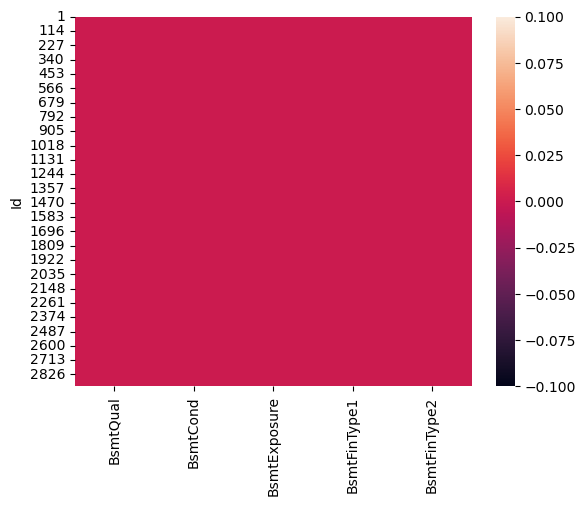

In [63]:
sns.heatmap(df_miss_value_impute[cat_bsmt_feat].isnull())

<AxesSubplot:ylabel='Id'>

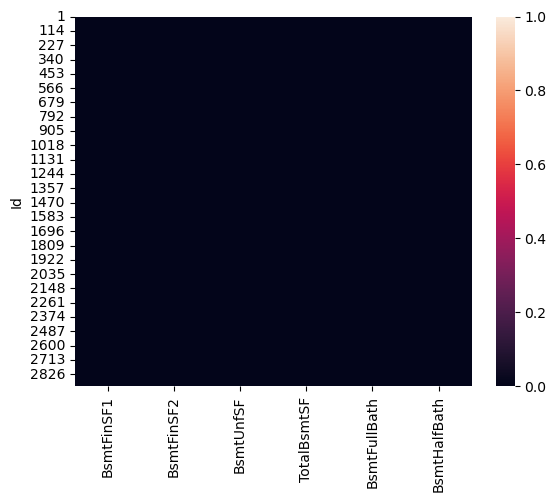

In [64]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [65]:
df_bsmt=df[cat_bsmt_feat+num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_miss_value_impute[feat].replace(np.nan,bsmt_num, inplace=True )

In [67]:
df_miss_value_impute[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

# Handling Electrical (0.034258) and KitchenQual (0.034258) features

In [68]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [69]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [70]:
df_ekk=df[['Electrical','KitchenQual','KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [71]:
electrical_mode=df_miss_value_impute['Electrical'].mode()[0]
df_miss_value_impute['Electrical'].replace(np.nan,electrical_mode,inplace=True)
df_miss_value_impute['Electrical'].isnull().sum()

0

In [72]:
kitchenQual_mode=df_miss_value_impute['KitchenQual'].mode()[0]
df_miss_value_impute['KitchenQual'].replace(np.nan,electrical_mode,inplace=True)
df_miss_value_impute['KitchenQual'].isnull().sum()

0

# Handling Garage features

In [73]:
cat_garage_feat=['GarageType','GarageFinish','GarageQual' ,'GarageCond']

num_garage_feat=['GarageYrBlt','GarageCars','GarageArea']

<AxesSubplot:ylabel='Id'>

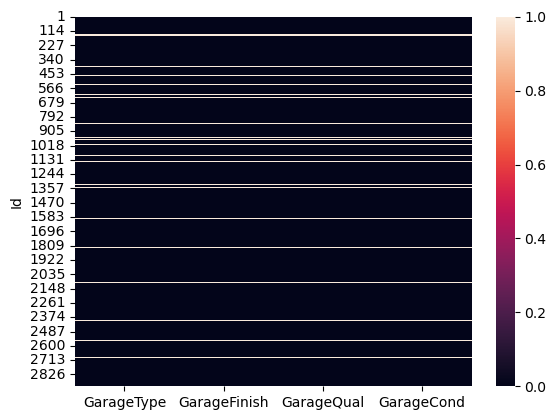

In [74]:
sns.heatmap(df[cat_garage_feat].isnull())

In [75]:
for cgfeat in cat_garage_feat:
    print(f'Count value of {cgfeat}:{df[cgfeat].value_counts()}')

Count value of GarageType:Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Count value of GarageFinish:Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
Count value of GarageQual:TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Count value of GarageCond:TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


In [76]:
cat_garage_feat_na='NA'
for cgfeat in cat_garage_feat:
    df_miss_value_impute[cgfeat].replace(np.nan,cat_garage_feat_na,inplace=True)
df_miss_value_impute[cgfeat].isnull().sum()
df_miss_value_impute[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

<AxesSubplot:ylabel='Id'>

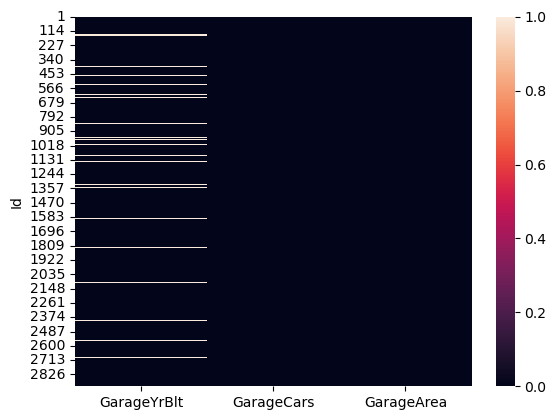

In [77]:
sns.heatmap(df[num_garage_feat].isnull())

In [78]:
df_garage=df[cat_garage_feat+num_garage_feat]
df_garage[df_bsmt.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
18,CarPort,Unf,TA,TA,1967.0,2.0,516.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
91,Detchd,Unf,TA,TA,1950.0,2.0,420.0
103,Attchd,Unf,TA,TA,1979.0,2.0,410.0
157,Detchd,Unf,TA,TA,1950.0,2.0,625.0
183,Attchd,RFn,TA,TA,1957.0,1.0,252.0
260,Detchd,Unf,TA,TA,1956.0,1.0,308.0
333,Attchd,RFn,TA,TA,2003.0,3.0,880.0
343,Detchd,Unf,TA,TA,1949.0,2.0,400.0


In [79]:
num_garage_feat_zero=0
for ngfeat in num_garage_feat:
    df_miss_value_impute[ngfeat].replace(np.nan,num_garage_feat_zero,inplace=True)
df_miss_value_impute[ngfeat].isnull().sum()
df_miss_value_impute[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

# Handling Remaining Catgorical features

In [80]:
rem_cat_feat=['Functional','FireplaceQu','PoolQC','Fence','MiscFeature','SaleType']
for rcfeat in rem_cat_feat:
    print(f'Value count of {rcfeat}:{df[rcfeat].value_counts()}')

Value count of Functional:Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
Value count of FireplaceQu:Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of PoolQC:Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence:MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of MiscFeature:Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
Value count of SaleType:WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


In [81]:
functional_mode=df_miss_value_impute['Functional'].mode()[0]
df_miss_value_impute['Functional'].replace(np.nan,electrical_mode,inplace=True)
df_miss_value_impute['Functional'].isnull().sum()

0

In [82]:
rem_feat=['FireplaceQu','PoolQC','Fence','MiscFeature']

In [83]:
rem_feat_na='NA'
for rfeat in rem_feat:
    df_miss_value_impute[rfeat].replace(np.nan,rem_feat_na,inplace=True)
df_miss_value_impute[rfeat].isnull().sum()

0

In [84]:
saleType_mode=df_miss_value_impute['SaleType'].mode()[0]
df_miss_value_impute['SaleType'].replace(np.nan,saleType_mode,inplace=True)
df_miss_value_impute['SaleType'].isnull().sum()

0

In [85]:
df_miss_value_impute.isnull().any(axis=1).sum()

1459

In [86]:
df_miss_value_impute.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
2,20,RL,80.000000,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
3,60,RL,68.000000,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,70,RL,60.000000,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.000000,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
6,50,RL,85.000000,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
7,20,RL,75.000000,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000.0
8,60,RL,69.305795,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000.0
9,50,RM,51.000000,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,

# Feature Transformation

# Convert numarical features to catgorical features

In [87]:
for_num_conv=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
for feat in for_num_conv:
    print(f'Data type of {feat}:{df_miss_value_impute[feat].dtype}')

Data type of MSSubClass:int64
Data type of YearBuilt:int64
Data type of YearRemodAdd:int64
Data type of GarageYrBlt:float64
Data type of MoSold:int64
Data type of YrSold:int64


In [88]:
df_miss_value_impute[for_num_conv]

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008
6,50,1993,1995,1993.0,10,2009
7,20,2004,2005,2004.0,8,2007
8,60,1973,1973,1973.0,11,2009
9,50,1931,1950,1931.0,4,2008


In [89]:
df_miss_value_impute['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [90]:
calendar.month_abbr[12]  

'Dec'

In [91]:
df_miss_value_impute['MoSold']=df_miss_value_impute['MoSold'].apply(lambda x: calendar.month_abbr[x])
df_miss_value_impute['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [92]:
for feat in for_num_conv:
    df_miss_value_impute[feat]=df_miss_value_impute[feat].astype(str)

In [93]:
for feat in for_num_conv:
    print(f'{feat} data type: {df_miss_value_impute[feat].dtype}')

MSSubClass data type: object
YearBuilt data type: object
YearRemodAdd data type: object
GarageYrBlt data type: object
MoSold data type: object
YrSold data type: object


# Convert Catgorical features into Numerical features

# Ordunal encoding

In [94]:
ordinal_end_var=[
    'Utilities',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'PavedDrive'
]
print('Total number of features to convert ordinal numerical format:',len(ordinal_end_var))

Total number of features to convert ordinal numerical format: 17


In [95]:
df_miss_value_impute['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [96]:
df_miss_value_impute['ExterQual']=df_miss_value_impute['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [97]:
df_miss_value_impute['ExterQual'].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [98]:
for feat in ordinal_end_var:
    print(f'Value count of {feat}:{df[feat].value_counts()}')

Value count of Utilities:AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Value count of ExterQual:TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
Value count of ExterCond:TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
Value count of BsmtQual:TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond:TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure:No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1:Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2:Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
Value count of HeatingQC:Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64
Value count of KitchenQual:TA    1492

In [99]:
df_miss_value_impute['Utilities']=df_miss_value_impute['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes
df_miss_value_impute['ExterCond']=df_miss_value_impute['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['BsmtQual']=df_miss_value_impute['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['BsmtCond']=df_miss_value_impute['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['BsmtExposure']=df_miss_value_impute['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes
df_miss_value_impute['BsmtFinType1']=df_miss_value_impute['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_miss_value_impute['BsmtFinType2']=df_miss_value_impute['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_miss_value_impute['HeatingQC']=df_miss_value_impute['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['KitchenQual']=df_miss_value_impute['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['Functional']=df_miss_value_impute['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
df_miss_value_impute['FireplaceQu']=df_miss_value_impute['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['GarageFinish']=df_miss_value_impute['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df_miss_value_impute['GarageQual']=df_miss_value_impute['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['GarageCond']=df_miss_value_impute['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['PoolQC']=df_miss_value_impute['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_miss_value_impute['PavedDrive']=df_miss_value_impute['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes

In [100]:
for feat in ordinal_end_var:
    print(f'Value count of {feat}:{df_miss_value_impute[feat].value_counts()}')

Value count of Utilities:3    2918
1       1
Name: Utilities, dtype: int64
Value count of ExterQual:2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64
Value count of ExterCond:2    2538
3     299
1      67
4      12
0       3
Name: ExterCond, dtype: int64
Value count of BsmtQual:3    1283
4    1209
5     258
2      88
0      81
Name: BsmtQual, dtype: int64
Value count of BsmtCond:3    2606
4     122
2     104
0      82
1       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure:1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1:1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2:1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64
Value count of HeatingQC:4    1493
2     857
3     474
1      92
0       3
Name: HeatingQC, dtype: int64
Value count of KitchenQual: 2    1492
 3    1151

In [101]:
df_miss_value_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# One Hot Encoding for nominal categorical data

In [102]:
df_encode=df_miss_value_impute.copy()

object_features=df_miss_value_impute.select_dtypes(include='object').columns.tolist()
print('Total nuber of object data type features:',len(object_features))
print('Features \n:',object_features)

Total nuber of object data type features: 32
Features 
: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [103]:
df_encode[object_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [104]:
print('Shape of df before encoding:',df_encode.shape)
df_encode=pd.get_dummies(df_encode,
                         columns=object_features,
                         prefix=object_features,
                         drop_first=True)
print('Shape of df after encoding:',df_encode.shape)

Shape of df before encoding: (2919, 80)
Shape of df after encoding: (2919, 513)


In [105]:
df_encode.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_19

In [106]:
df_encode.select_dtypes(include='object').columns.tolist()

[]

# Split Data for training and testing

In [107]:
df_encode.shape

(2919, 513)

In [108]:
len_train=df_train.shape[0]
len_train

1460

In [109]:
X_train=df_encode[:len_train].drop('SalePrice',axis=1)
y_train=df_encode['SalePrice'][:len_train]
X_test=df_encode[len_train:].drop('SalePrice',axis=1)

print('Shape of X train data:',X_train.shape)
print('Shape of y train data:',y_train.shape)
print('Shape of X test data:',X_test.shape)

Shape of X train data: (1460, 512)
Shape of y train data: (1460,)
Shape of X test data: (1459, 512)


# Features Scaling

In [110]:
sc=StandardScaler()
sc.fit(X_train)
#Formula Z=(x-u)/s

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [111]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [112]:
X_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

# Model Training

In [113]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression

In [114]:
Linear_Regression = LinearRegression()
Ridge_Regression = Ridge()
Lasso_Regression = Lasso()
Elastic_Net = ElasticNet()
Support_Vector_Machine = SVR()
K_Nearest_Neighbors = KNeighborsRegressor()
Decision_Tree = DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Gradient_Boosting = GradientBoostingRegressor()
Multi_layer_Perceptron = MLPRegressor()
AdaBoost = AdaBoostRegressor()
Bagging = BaggingRegressor()
XGBoost = XGBRegressor()
LightGBM = LGBMRegressor()
CatBoost = CatBoostRegressor()
SGDR = SGDRegressor()
gaussian_process = GaussianProcessRegressor()
isotonic = IsotonicRegression()

In [115]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# LinearRegression Model

In [156]:
Linear_Regression = LinearRegression()
test_model(Linear_Regression)

[-2.4195377333578387e+24]

In [157]:
# Cross validation
cross_validation = cross_val_score(estimator = Linear_Regression, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [-4.47331379e+19 -3.57403195e+23 -4.17219370e+21 -5.84019401e+20
 -5.32670979e+20 -2.31095643e+25 -6.11213315e+24 -5.07677859e+24
 -3.02024856e+22 -5.94678451e+20]

Cross validation mean accuracy of LR model =  -3.469201004688885e+24


# RidgeRegression Model

In [120]:
Ridge_Regression = Ridge()
test_model(Ridge_Regression)

[0.5784964567915549]

In [155]:
cross_validation = cross_val_score(estimator = Ridge_Regression, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of Ridge_Regression model = ", cross_validation)
print("\nCross validation mean accuracy of Ridge_Regression model = ", cross_validation.mean())

Cross validation accuracy of Ridge_Regression model =  [0.07667202 0.21562903 0.84720356 0.68164801 0.89836964 0.60799639
 0.83398664 0.81541141 0.46109635 0.81930027]

Cross validation mean accuracy of Ridge_Regression model =  0.625731332655396


# Lasso_Regression Model

In [159]:
Lasso_Regression = Lasso()
test_model(Lasso_Regression)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.225e+10, tolerance: 6.264e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.157e+10, tolerance: 5.972e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.853e+10, tolerance: 

[0.5280946858687553]

In [123]:
cross_validation = cross_val_score(estimator = Lasso_Regression, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of Lasso_Regression model = ", cross_validation)
print("\nCross validation mean accuracy of Lasso_Regression model = ", cross_validation.mean())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+11, tolerance: 8.524e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.343e+10, tolerance: 8.274e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+11, tolerance: 

Cross validation accuracy of Lasso_Regression model =  [-0.06790914  0.08141124  0.84285522  0.67365087  0.90051671  0.59250488
  0.83578248  0.81697189  0.46486531  0.81137217]

Cross validation mean accuracy of Lasso_Regression model =  0.5952021640704979


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.780e+10, tolerance: 8.439e+08
  model = cd_fast.enet_coordinate_descent(


# ElasticNet Model

In [124]:
Elastic_Net = ElasticNet()
test_model(Elastic_Net)

[0.7884340888803104]

In [125]:
cross_validation = cross_val_score(estimator = Elastic_Net, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of ElasticNet model = ", cross_validation)
print("\nCross validation mean accuracy of ElasticNet model = ", cross_validation.mean())

Cross validation accuracy of ElasticNet model =  [0.8987736  0.87863428 0.88074818 0.77379174 0.83823372 0.8317094
 0.84754206 0.85359657 0.57500472 0.88608307]

Cross validation mean accuracy of ElasticNet model =  0.8264117337359451


# Support_Vector_Machine Model

In [126]:
Support_Vector_Machine = SVR()
test_model(Support_Vector_Machine)

[-0.051897588980563514]

In [127]:
cross_validation = cross_val_score(estimator = Support_Vector_Machine, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of Support_Vector_Machine model = ", cross_validation)
print("\nCross validation mean accuracy of Support_Vector_Machine model = ", cross_validation.mean())

Cross validation accuracy of Support_Vector_Machine model =  [-0.0267506  -0.11879698 -0.0632138  -0.05783749 -0.05308207 -0.06771523
 -0.02060481 -0.01578838 -0.08894406 -0.02591068]

Cross validation mean accuracy of Support_Vector_Machine model =  -0.05386441002743951


# K_Nearest_Neighbors Model

In [128]:
K_Nearest_Neighbors = KNeighborsRegressor()
test_model(K_Nearest_Neighbors)

[0.5360660236916017]

In [129]:
cross_validation = cross_val_score(estimator = K_Nearest_Neighbors, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of K_Nearest_Neighbors model = ", cross_validation)
print("\nCross validation mean accuracy of K_Nearest_Neighbors model = ", cross_validation.mean())

Cross validation accuracy of K_Nearest_Neighbors model =  [0.62203979 0.58628407 0.67506128 0.54485511 0.50224932 0.61862568
 0.57028167 0.64623101 0.40930301 0.56907704]

Cross validation mean accuracy of K_Nearest_Neighbors model =  0.5744007988900128


# DecisionTreeRegressor Model

In [130]:
Decision_Tree = DecisionTreeRegressor()
test_model(Decision_Tree)

[0.6394803292201224]

In [131]:
cross_validation = cross_val_score(estimator = Decision_Tree, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of Decision_Tree model = ", cross_validation)
print("\nCross validation mean accuracy of Decision_Tree model = ", cross_validation.mean())

Cross validation accuracy of Decision_Tree model =  [0.72811272 0.75347315 0.80495656 0.62839751 0.83142722 0.86848244
 0.81176458 0.7761294  0.6800728  0.73733555]

Cross validation mean accuracy of Decision_Tree model =  0.7620151934452805


# RandomForestRegressor Model

In [132]:
Random_Forest = RandomForestRegressor()
test_model(Random_Forest)

[0.8282753181764138]

In [133]:
cross_validation = cross_val_score(estimator = Random_Forest, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of RandomForestRegressor = ", cross_validation)
print("\nCross validation mean accuracy of RandomForestRegressor model = ", cross_validation.mean())

Cross validation accuracy of RandomForestRegressor =  [0.86691892 0.89214008 0.92125063 0.7837794  0.86695863 0.8801409
 0.88336723 0.88183217 0.77516684 0.85680886]

Cross validation mean accuracy of RandomForestRegressor model =  0.860836367209798


# GradientBoostingRegressor Model

In [162]:
Gradient_Boosting = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
test_model(Gradient_Boosting)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[0.8532044565988693]

In [135]:
cross_validation = cross_val_score(estimator = Gradient_Boosting, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of GradientBoostingRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of GradientBoostingRegressor model = ", cross_validation.mean())

Cross validation accuracy of GradientBoostingRegressor model =  [0.9076594  0.90981372 0.93694053 0.78615053 0.89139926 0.89168531
 0.88324525 0.89663812 0.88653762 0.89031698]

Cross validation mean accuracy of GradientBoostingRegressor model =  0.8880386724237768


# MLPRegressor Model

In [136]:
Multi_layer_Perceptron = MLPRegressor()
test_model(Multi_layer_Perceptron)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[-4.904726536517045]

In [137]:
cross_validation = cross_val_score(estimator = Multi_layer_Perceptron, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of MLPRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of MLPRegressor model = ", cross_validation.mean())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Cross validation accuracy of MLPRegressor model =  [-5.88941541 -5.02418524 -4.77428348 -4.36392843 -3.33934232 -5.05631642
 -5.18289483 -5.37506224 -3.94964854 -5.24559992]

Cross validation mean accuracy of MLPRegressor model =  -4.8200676853736315


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# AdaBoostRegressor Model

In [138]:
AdaBoost = AdaBoostRegressor()
test_model(AdaBoost)

[0.7913733854172796]

In [139]:
cross_validation = cross_val_score(estimator =AdaBoost, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of AdaBoostRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of AdaBoostRegressor model = ", cross_validation.mean())

Cross validation accuracy of AdaBoostRegressor model =  [0.83403686 0.8236406  0.86155644 0.72687731 0.83219347 0.79230354
 0.80958151 0.79546124 0.73244417 0.77137535]

Cross validation mean accuracy of AdaBoostRegressor model =  0.7979470478396767


# BaggingRegressor Model

In [140]:
Bagging = BaggingRegressor()
test_model(Bagging)

[0.8217532413947594]

In [141]:
cross_validation = cross_val_score(estimator = Bagging, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of BaggingRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of BaggingRegressor model = ", cross_validation.mean())

Cross validation accuracy of BaggingRegressor model =  [0.82835878 0.86314734 0.90809626 0.78462685 0.83688381 0.86073536
 0.89786238 0.86448584 0.73638659 0.85090378]

Cross validation mean accuracy of BaggingRegressor model =  0.8431487005955691


# XGBRegressor Model

In [142]:
XGBoost = XGBRegressor()
test_model(XGBoost)

[0.8161708121495793]

In [143]:
cross_validation = cross_val_score(estimator = XGBoost, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of XGBRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of XGBRegressor model = ", cross_validation.mean())

Cross validation accuracy of XGBRegressor model =  [0.88532635 0.88723589 0.91965185 0.7768192  0.89514162 0.90363343
 0.88911089 0.90495643 0.8154399  0.86397747]

Cross validation mean accuracy of XGBRegressor model =  0.8741293021759435


# LGBMRegressor Model

In [144]:
LightGBM = LGBMRegressor()
test_model(LightGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 172
[LightGBM] [Info] Start training from score 180669.638232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 174
[LightGBM] [Info] Start training from score 180092.024666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[0.856321686678634]

In [145]:
cross_validation = cross_val_score(estimator = LightGBM, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LGBMRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of LGBMRegressor model = ", cross_validation.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 209
[LightGBM] [Info] Start training from score 181632.805175
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3275
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 209
[LightGBM] [Info] Start training from score 180028.160578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

# CatBoostRegressor Model

In [169]:
CatBoost = CatBoostRegressor()
test_model(CatBoost)

0:	learn: 75344.8017496	total: 11.6ms	remaining: 11.6s
1:	learn: 70927.1478549	total: 21.8ms	remaining: 10.9s
2:	learn: 66729.5416280	total: 32.4ms	remaining: 10.8s
3:	learn: 63115.2865158	total: 42.2ms	remaining: 10.5s
4:	learn: 59855.5610591	total: 52.4ms	remaining: 10.4s
5:	learn: 56582.9076405	total: 63.9ms	remaining: 10.6s
6:	learn: 54159.8864246	total: 74.5ms	remaining: 10.6s
7:	learn: 51546.0325516	total: 84.6ms	remaining: 10.5s
8:	learn: 49129.9542078	total: 93.5ms	remaining: 10.3s
9:	learn: 46952.9040281	total: 102ms	remaining: 10.1s
10:	learn: 45155.2955230	total: 112ms	remaining: 10.1s
11:	learn: 43391.8702361	total: 122ms	remaining: 10.1s
12:	learn: 41751.6670613	total: 132ms	remaining: 10s
13:	learn: 40326.5874103	total: 143ms	remaining: 10s
14:	learn: 38632.5991749	total: 153ms	remaining: 10s
15:	learn: 37329.8349316	total: 163ms	remaining: 10s
16:	learn: 36213.2641011	total: 172ms	remaining: 9.97s
17:	learn: 34929.8673159	total: 181ms	remaining: 9.9s
18:	learn: 33982.968

158:	learn: 12250.5779808	total: 1.6s	remaining: 8.44s
159:	learn: 12171.9848232	total: 1.61s	remaining: 8.43s
160:	learn: 12147.3612014	total: 1.61s	remaining: 8.42s
161:	learn: 12099.9317488	total: 1.63s	remaining: 8.41s
162:	learn: 12070.7872113	total: 1.63s	remaining: 8.39s
163:	learn: 12056.1037422	total: 1.64s	remaining: 8.38s
164:	learn: 12044.7134203	total: 1.65s	remaining: 8.36s
165:	learn: 12016.7390126	total: 1.66s	remaining: 8.35s
166:	learn: 11972.5814371	total: 1.67s	remaining: 8.33s
167:	learn: 11939.7081414	total: 1.68s	remaining: 8.32s
168:	learn: 11899.4529476	total: 1.69s	remaining: 8.31s
169:	learn: 11893.1989860	total: 1.7s	remaining: 8.3s
170:	learn: 11824.5789708	total: 1.71s	remaining: 8.29s
171:	learn: 11780.9719275	total: 1.72s	remaining: 8.28s
172:	learn: 11729.6556987	total: 1.73s	remaining: 8.27s
173:	learn: 11722.8441811	total: 1.74s	remaining: 8.25s
174:	learn: 11707.3656094	total: 1.75s	remaining: 8.24s
175:	learn: 11668.8548293	total: 1.76s	remaining: 8

315:	learn: 7684.2104710	total: 3.19s	remaining: 6.92s
316:	learn: 7654.6215256	total: 3.22s	remaining: 6.94s
317:	learn: 7609.6321851	total: 3.28s	remaining: 7.03s
318:	learn: 7576.8359969	total: 3.31s	remaining: 7.07s
319:	learn: 7565.9942467	total: 3.33s	remaining: 7.08s
320:	learn: 7563.6071778	total: 3.34s	remaining: 7.08s
321:	learn: 7524.1902541	total: 3.39s	remaining: 7.14s
322:	learn: 7502.2546057	total: 3.41s	remaining: 7.15s
323:	learn: 7489.2108262	total: 3.43s	remaining: 7.16s
324:	learn: 7456.0063937	total: 3.44s	remaining: 7.15s
325:	learn: 7442.0767924	total: 3.46s	remaining: 7.14s
326:	learn: 7439.8207700	total: 3.47s	remaining: 7.14s
327:	learn: 7408.8222804	total: 3.48s	remaining: 7.13s
328:	learn: 7382.3653116	total: 3.49s	remaining: 7.12s
329:	learn: 7358.2759527	total: 3.5s	remaining: 7.1s
330:	learn: 7315.8323844	total: 3.5s	remaining: 7.08s
331:	learn: 7288.4512764	total: 3.51s	remaining: 7.07s
332:	learn: 7264.7777488	total: 3.52s	remaining: 7.05s
333:	learn: 7

480:	learn: 4989.6236526	total: 4.86s	remaining: 5.24s
481:	learn: 4988.0224623	total: 4.87s	remaining: 5.23s
482:	learn: 4970.6519791	total: 4.88s	remaining: 5.22s
483:	learn: 4953.2889606	total: 4.89s	remaining: 5.21s
484:	learn: 4934.8227436	total: 4.9s	remaining: 5.2s
485:	learn: 4924.8537258	total: 4.91s	remaining: 5.19s
486:	learn: 4912.3148998	total: 4.92s	remaining: 5.18s
487:	learn: 4902.4400322	total: 4.92s	remaining: 5.17s
488:	learn: 4901.0326946	total: 4.93s	remaining: 5.15s
489:	learn: 4899.7703310	total: 4.94s	remaining: 5.14s
490:	learn: 4887.1043615	total: 4.95s	remaining: 5.13s
491:	learn: 4865.8421758	total: 4.95s	remaining: 5.12s
492:	learn: 4846.4494821	total: 4.96s	remaining: 5.11s
493:	learn: 4835.2931600	total: 4.97s	remaining: 5.1s
494:	learn: 4813.2289066	total: 4.99s	remaining: 5.09s
495:	learn: 4794.1163961	total: 5s	remaining: 5.08s
496:	learn: 4782.1981337	total: 5s	remaining: 5.06s
497:	learn: 4767.9409085	total: 5.01s	remaining: 5.05s
498:	learn: 4752.84

647:	learn: 3331.6428838	total: 6.28s	remaining: 3.41s
648:	learn: 3319.7105940	total: 6.29s	remaining: 3.4s
649:	learn: 3319.0183519	total: 6.3s	remaining: 3.39s
650:	learn: 3312.1710141	total: 6.31s	remaining: 3.38s
651:	learn: 3307.1330131	total: 6.32s	remaining: 3.38s
652:	learn: 3294.8584115	total: 6.33s	remaining: 3.36s
653:	learn: 3284.5327220	total: 6.34s	remaining: 3.35s
654:	learn: 3275.1462679	total: 6.35s	remaining: 3.34s
655:	learn: 3267.8051685	total: 6.36s	remaining: 3.33s
656:	learn: 3263.5946667	total: 6.36s	remaining: 3.32s
657:	learn: 3257.8781335	total: 6.37s	remaining: 3.31s
658:	learn: 3247.0199207	total: 6.38s	remaining: 3.3s
659:	learn: 3240.4800411	total: 6.39s	remaining: 3.29s
660:	learn: 3231.9490528	total: 6.39s	remaining: 3.28s
661:	learn: 3223.1490737	total: 6.4s	remaining: 3.27s
662:	learn: 3215.6540089	total: 6.41s	remaining: 3.26s
663:	learn: 3205.6536452	total: 6.42s	remaining: 3.25s
664:	learn: 3199.6623838	total: 6.42s	remaining: 3.24s
665:	learn: 31

818:	learn: 2296.4271704	total: 7.72s	remaining: 1.71s
819:	learn: 2288.8733357	total: 7.74s	remaining: 1.7s
820:	learn: 2279.6556416	total: 7.75s	remaining: 1.69s
821:	learn: 2274.4553447	total: 7.76s	remaining: 1.68s
822:	learn: 2272.9014202	total: 7.77s	remaining: 1.67s
823:	learn: 2272.5056513	total: 7.78s	remaining: 1.66s
824:	learn: 2267.6494566	total: 7.79s	remaining: 1.65s
825:	learn: 2264.0741686	total: 7.8s	remaining: 1.64s
826:	learn: 2257.8170746	total: 7.81s	remaining: 1.63s
827:	learn: 2254.2775373	total: 7.82s	remaining: 1.62s
828:	learn: 2248.7060552	total: 7.83s	remaining: 1.61s
829:	learn: 2248.4797172	total: 7.84s	remaining: 1.6s
830:	learn: 2243.7768422	total: 7.84s	remaining: 1.59s
831:	learn: 2242.6467573	total: 7.85s	remaining: 1.58s
832:	learn: 2242.3107304	total: 7.86s	remaining: 1.58s
833:	learn: 2240.0696450	total: 7.87s	remaining: 1.57s
834:	learn: 2239.4932714	total: 7.88s	remaining: 1.56s
835:	learn: 2233.1175235	total: 7.89s	remaining: 1.55s
836:	learn: 2

989:	learn: 1680.4683198	total: 9.16s	remaining: 92.6ms
990:	learn: 1675.3927578	total: 9.18s	remaining: 83.3ms
991:	learn: 1671.3281617	total: 9.19s	remaining: 74.1ms
992:	learn: 1667.1211499	total: 9.2s	remaining: 64.8ms
993:	learn: 1666.8921231	total: 9.21s	remaining: 55.6ms
994:	learn: 1660.7227248	total: 9.21s	remaining: 46.3ms
995:	learn: 1657.0878059	total: 9.22s	remaining: 37ms
996:	learn: 1653.9451154	total: 9.23s	remaining: 27.8ms
997:	learn: 1650.9814171	total: 9.24s	remaining: 18.5ms
998:	learn: 1648.4821464	total: 9.25s	remaining: 9.26ms
999:	learn: 1646.2185538	total: 9.26s	remaining: 0us
0:	learn: 73698.5839373	total: 24.6ms	remaining: 24.5s
1:	learn: 69279.9984466	total: 34.3ms	remaining: 17.1s
2:	learn: 65421.5441088	total: 43.9ms	remaining: 14.6s
3:	learn: 61650.4180785	total: 53.2ms	remaining: 13.2s
4:	learn: 58590.8359736	total: 62.6ms	remaining: 12.5s
5:	learn: 55472.8724818	total: 72.5ms	remaining: 12s
6:	learn: 52531.8878437	total: 82.1ms	remaining: 11.6s
7:	lear

142:	learn: 12529.1588808	total: 1.47s	remaining: 8.78s
143:	learn: 12513.9131960	total: 1.48s	remaining: 8.78s
144:	learn: 12501.9869659	total: 1.49s	remaining: 8.78s
145:	learn: 12460.1566647	total: 1.5s	remaining: 8.78s
146:	learn: 12424.8538586	total: 1.51s	remaining: 8.77s
147:	learn: 12414.9183469	total: 1.52s	remaining: 8.76s
148:	learn: 12405.1025187	total: 1.53s	remaining: 8.74s
149:	learn: 12363.2211998	total: 1.54s	remaining: 8.74s
150:	learn: 12324.5905110	total: 1.55s	remaining: 8.72s
151:	learn: 12280.5274536	total: 1.56s	remaining: 8.71s
152:	learn: 12232.0794427	total: 1.57s	remaining: 8.7s
153:	learn: 12191.8860859	total: 1.58s	remaining: 8.68s
154:	learn: 12181.8323010	total: 1.59s	remaining: 8.66s
155:	learn: 12111.7703735	total: 1.6s	remaining: 8.64s
156:	learn: 12079.9300707	total: 1.61s	remaining: 8.63s
157:	learn: 12068.5651696	total: 1.62s	remaining: 8.61s
158:	learn: 12040.2249975	total: 1.63s	remaining: 8.6s
159:	learn: 12031.8832999	total: 1.64s	remaining: 8.

298:	learn: 7851.3183954	total: 3.12s	remaining: 7.32s
299:	learn: 7822.4888034	total: 3.13s	remaining: 7.31s
300:	learn: 7794.1342298	total: 3.15s	remaining: 7.31s
301:	learn: 7759.5642158	total: 3.16s	remaining: 7.3s
302:	learn: 7734.2151387	total: 3.17s	remaining: 7.29s
303:	learn: 7731.7534561	total: 3.18s	remaining: 7.28s
304:	learn: 7691.2542479	total: 3.19s	remaining: 7.27s
305:	learn: 7673.8882261	total: 3.2s	remaining: 7.26s
306:	learn: 7654.9272167	total: 3.21s	remaining: 7.25s
307:	learn: 7652.8974149	total: 3.22s	remaining: 7.23s
308:	learn: 7638.3421115	total: 3.23s	remaining: 7.22s
309:	learn: 7606.5791355	total: 3.25s	remaining: 7.24s
310:	learn: 7583.6505895	total: 3.26s	remaining: 7.23s
311:	learn: 7547.0295407	total: 3.27s	remaining: 7.22s
312:	learn: 7531.6262398	total: 3.28s	remaining: 7.21s
313:	learn: 7524.1134959	total: 3.29s	remaining: 7.19s
314:	learn: 7492.6456137	total: 3.3s	remaining: 7.18s
315:	learn: 7468.3466625	total: 3.31s	remaining: 7.17s
316:	learn: 7

453:	learn: 5301.3387292	total: 4.78s	remaining: 5.75s
454:	learn: 5286.6514516	total: 4.79s	remaining: 5.74s
455:	learn: 5278.5362813	total: 4.8s	remaining: 5.73s
456:	learn: 5265.0182296	total: 4.82s	remaining: 5.72s
457:	learn: 5242.1019424	total: 4.83s	remaining: 5.71s
458:	learn: 5222.8212729	total: 4.84s	remaining: 5.7s
459:	learn: 5207.1554965	total: 4.85s	remaining: 5.69s
460:	learn: 5193.2665401	total: 4.86s	remaining: 5.68s
461:	learn: 5170.6150298	total: 4.87s	remaining: 5.67s
462:	learn: 5158.6675366	total: 4.88s	remaining: 5.66s
463:	learn: 5150.6282049	total: 4.89s	remaining: 5.64s
464:	learn: 5145.5155160	total: 4.9s	remaining: 5.63s
465:	learn: 5136.1669234	total: 4.91s	remaining: 5.62s
466:	learn: 5127.0013526	total: 4.92s	remaining: 5.61s
467:	learn: 5121.7607731	total: 4.92s	remaining: 5.6s
468:	learn: 5096.1391756	total: 4.93s	remaining: 5.59s
469:	learn: 5090.1091939	total: 4.94s	remaining: 5.57s
470:	learn: 5075.8369621	total: 4.95s	remaining: 5.56s
471:	learn: 50

613:	learn: 3706.2091628	total: 6.44s	remaining: 4.05s
614:	learn: 3705.2931636	total: 6.45s	remaining: 4.04s
615:	learn: 3699.4686444	total: 6.46s	remaining: 4.03s
616:	learn: 3690.7694889	total: 6.47s	remaining: 4.02s
617:	learn: 3676.3653754	total: 6.49s	remaining: 4.01s
618:	learn: 3669.5691091	total: 6.5s	remaining: 4s
619:	learn: 3661.4591789	total: 6.5s	remaining: 3.99s
620:	learn: 3653.6371446	total: 6.51s	remaining: 3.98s
621:	learn: 3641.7067249	total: 6.52s	remaining: 3.96s
622:	learn: 3630.5585635	total: 6.53s	remaining: 3.95s
623:	learn: 3613.3482024	total: 6.54s	remaining: 3.94s
624:	learn: 3608.3807898	total: 6.55s	remaining: 3.93s
625:	learn: 3599.6450887	total: 6.56s	remaining: 3.92s
626:	learn: 3587.8691980	total: 6.57s	remaining: 3.91s
627:	learn: 3586.7520328	total: 6.58s	remaining: 3.9s
628:	learn: 3581.5553774	total: 6.59s	remaining: 3.89s
629:	learn: 3578.1788025	total: 6.6s	remaining: 3.88s
630:	learn: 3570.3540996	total: 6.61s	remaining: 3.86s
631:	learn: 3562.

772:	learn: 2699.9345998	total: 8.08s	remaining: 2.37s
773:	learn: 2694.0612699	total: 8.09s	remaining: 2.36s
774:	learn: 2689.1027386	total: 8.11s	remaining: 2.35s
775:	learn: 2688.5356609	total: 8.12s	remaining: 2.34s
776:	learn: 2683.8881878	total: 8.13s	remaining: 2.33s
777:	learn: 2677.3601212	total: 8.14s	remaining: 2.32s
778:	learn: 2664.7581960	total: 8.15s	remaining: 2.31s
779:	learn: 2661.1208984	total: 8.16s	remaining: 2.3s
780:	learn: 2660.6276754	total: 8.17s	remaining: 2.29s
781:	learn: 2659.0767401	total: 8.18s	remaining: 2.28s
782:	learn: 2657.1124910	total: 8.19s	remaining: 2.27s
783:	learn: 2655.2820796	total: 8.2s	remaining: 2.26s
784:	learn: 2652.4171935	total: 8.21s	remaining: 2.25s
785:	learn: 2651.7135992	total: 8.23s	remaining: 2.24s
786:	learn: 2648.5667526	total: 8.24s	remaining: 2.23s
787:	learn: 2643.3742709	total: 8.25s	remaining: 2.22s
788:	learn: 2638.9177548	total: 8.26s	remaining: 2.21s
789:	learn: 2637.6782279	total: 8.27s	remaining: 2.2s
790:	learn: 2

923:	learn: 2117.9575202	total: 9.76s	remaining: 802ms
924:	learn: 2117.6044091	total: 9.77s	remaining: 792ms
925:	learn: 2116.6564105	total: 9.78s	remaining: 782ms
926:	learn: 2109.6603536	total: 9.79s	remaining: 771ms
927:	learn: 2104.4877540	total: 9.8s	remaining: 761ms
928:	learn: 2101.0104513	total: 9.81s	remaining: 750ms
929:	learn: 2095.2373562	total: 9.82s	remaining: 739ms
930:	learn: 2091.2960172	total: 9.85s	remaining: 730ms
931:	learn: 2090.8082196	total: 9.86s	remaining: 719ms
932:	learn: 2088.5064364	total: 9.87s	remaining: 709ms
933:	learn: 2087.0285849	total: 9.88s	remaining: 698ms
934:	learn: 2077.7682242	total: 9.89s	remaining: 687ms
935:	learn: 2076.4203243	total: 9.89s	remaining: 677ms
936:	learn: 2069.4557577	total: 9.9s	remaining: 666ms
937:	learn: 2061.7151023	total: 9.91s	remaining: 655ms
938:	learn: 2054.1197235	total: 9.92s	remaining: 645ms
939:	learn: 2050.9922090	total: 9.93s	remaining: 634ms
940:	learn: 2044.2145267	total: 9.96s	remaining: 624ms
941:	learn: 

81:	learn: 18351.3880759	total: 848ms	remaining: 9.5s
82:	learn: 18318.6927484	total: 860ms	remaining: 9.51s
83:	learn: 18186.1272535	total: 873ms	remaining: 9.52s
84:	learn: 18084.4845476	total: 885ms	remaining: 9.52s
85:	learn: 18009.7385259	total: 896ms	remaining: 9.52s
86:	learn: 17906.2341259	total: 906ms	remaining: 9.51s
87:	learn: 17792.5393512	total: 916ms	remaining: 9.49s
88:	learn: 17735.1012377	total: 925ms	remaining: 9.47s
89:	learn: 17675.9047165	total: 934ms	remaining: 9.44s
90:	learn: 17553.4839945	total: 943ms	remaining: 9.42s
91:	learn: 17442.8116016	total: 953ms	remaining: 9.4s
92:	learn: 17332.8323210	total: 962ms	remaining: 9.38s
93:	learn: 17238.7003704	total: 971ms	remaining: 9.36s
94:	learn: 17201.2759146	total: 980ms	remaining: 9.33s
95:	learn: 17145.9248437	total: 989ms	remaining: 9.31s
96:	learn: 17058.2736044	total: 998ms	remaining: 9.29s
97:	learn: 16934.7690527	total: 1.01s	remaining: 9.27s
98:	learn: 16843.4841962	total: 1.02s	remaining: 9.25s
99:	learn: 1

244:	learn: 9994.9942442	total: 2.53s	remaining: 7.79s
245:	learn: 9989.7219366	total: 2.54s	remaining: 7.78s
246:	learn: 9947.6921147	total: 2.55s	remaining: 7.78s
247:	learn: 9906.2858164	total: 2.56s	remaining: 7.78s
248:	learn: 9866.2671658	total: 2.58s	remaining: 7.77s
249:	learn: 9861.4445257	total: 2.58s	remaining: 7.75s
250:	learn: 9822.7862754	total: 2.59s	remaining: 7.74s
251:	learn: 9819.4214011	total: 2.6s	remaining: 7.73s
252:	learn: 9783.2533232	total: 2.61s	remaining: 7.72s
253:	learn: 9755.5823676	total: 2.62s	remaining: 7.7s
254:	learn: 9732.2166683	total: 2.63s	remaining: 7.69s
255:	learn: 9654.3333169	total: 2.64s	remaining: 7.68s
256:	learn: 9625.4378872	total: 2.65s	remaining: 7.66s
257:	learn: 9590.0198436	total: 2.66s	remaining: 7.65s
258:	learn: 9538.3746135	total: 2.67s	remaining: 7.64s
259:	learn: 9534.9876910	total: 2.68s	remaining: 7.62s
260:	learn: 9494.3224119	total: 2.69s	remaining: 7.61s
261:	learn: 9476.4978616	total: 2.7s	remaining: 7.6s
262:	learn: 94

411:	learn: 6433.9564851	total: 4.2s	remaining: 5.99s
412:	learn: 6423.0888268	total: 4.21s	remaining: 5.99s
413:	learn: 6406.0518866	total: 4.22s	remaining: 5.98s
414:	learn: 6391.3177273	total: 4.24s	remaining: 5.97s
415:	learn: 6370.6081737	total: 4.25s	remaining: 5.96s
416:	learn: 6354.2072228	total: 4.26s	remaining: 5.95s
417:	learn: 6348.4722911	total: 4.27s	remaining: 5.94s
418:	learn: 6338.6557379	total: 4.28s	remaining: 5.93s
419:	learn: 6334.9671429	total: 4.29s	remaining: 5.92s
420:	learn: 6333.0534119	total: 4.3s	remaining: 5.91s
421:	learn: 6323.5018492	total: 4.31s	remaining: 5.9s
422:	learn: 6299.1780552	total: 4.32s	remaining: 5.89s
423:	learn: 6261.4263448	total: 4.33s	remaining: 5.88s
424:	learn: 6258.9915504	total: 4.33s	remaining: 5.87s
425:	learn: 6238.6705215	total: 4.34s	remaining: 5.86s
426:	learn: 6230.7335041	total: 4.35s	remaining: 5.84s
427:	learn: 6214.9731031	total: 4.36s	remaining: 5.83s
428:	learn: 6212.3998915	total: 4.37s	remaining: 5.82s
429:	learn: 6

572:	learn: 4425.4858240	total: 5.88s	remaining: 4.38s
573:	learn: 4420.2450295	total: 5.89s	remaining: 4.37s
574:	learn: 4410.6530173	total: 5.9s	remaining: 4.36s
575:	learn: 4400.6443117	total: 5.92s	remaining: 4.35s
576:	learn: 4399.5411388	total: 5.92s	remaining: 4.34s
577:	learn: 4380.1486985	total: 5.93s	remaining: 4.33s
578:	learn: 4376.1655467	total: 5.94s	remaining: 4.32s
579:	learn: 4374.2450356	total: 5.95s	remaining: 4.31s
580:	learn: 4362.4878426	total: 5.96s	remaining: 4.3s
581:	learn: 4337.0084019	total: 5.97s	remaining: 4.29s
582:	learn: 4331.2168485	total: 5.98s	remaining: 4.28s
583:	learn: 4330.2092429	total: 5.99s	remaining: 4.27s
584:	learn: 4328.2764295	total: 6s	remaining: 4.26s
585:	learn: 4327.4963482	total: 6.01s	remaining: 4.25s
586:	learn: 4315.9510441	total: 6.02s	remaining: 4.24s
587:	learn: 4311.1190468	total: 6.03s	remaining: 4.22s
588:	learn: 4305.0941762	total: 6.04s	remaining: 4.21s
589:	learn: 4291.9524877	total: 6.05s	remaining: 4.2s
590:	learn: 4287

729:	learn: 3290.2826812	total: 7.57s	remaining: 2.8s
730:	learn: 3277.4473541	total: 7.58s	remaining: 2.79s
731:	learn: 3269.7027937	total: 7.6s	remaining: 2.78s
732:	learn: 3267.9242101	total: 7.61s	remaining: 2.77s
733:	learn: 3259.8746173	total: 7.62s	remaining: 2.76s
734:	learn: 3255.0943245	total: 7.63s	remaining: 2.75s
735:	learn: 3252.8210305	total: 7.64s	remaining: 2.74s
736:	learn: 3252.1964177	total: 7.65s	remaining: 2.73s
737:	learn: 3251.2045116	total: 7.66s	remaining: 2.72s
738:	learn: 3250.2088745	total: 7.67s	remaining: 2.71s
739:	learn: 3249.6475045	total: 7.68s	remaining: 2.7s
740:	learn: 3233.9549449	total: 7.69s	remaining: 2.69s
741:	learn: 3220.6184509	total: 7.7s	remaining: 2.68s
742:	learn: 3206.2735460	total: 7.71s	remaining: 2.67s
743:	learn: 3199.1146291	total: 7.71s	remaining: 2.65s
744:	learn: 3198.5415968	total: 7.72s	remaining: 2.64s
745:	learn: 3185.0510085	total: 7.73s	remaining: 2.63s
746:	learn: 3174.5642697	total: 7.74s	remaining: 2.62s
747:	learn: 31

894:	learn: 2379.7767979	total: 9.23s	remaining: 1.08s
895:	learn: 2378.8982261	total: 9.24s	remaining: 1.07s
896:	learn: 2378.4837201	total: 9.25s	remaining: 1.06s
897:	learn: 2378.1701537	total: 9.27s	remaining: 1.05s
898:	learn: 2371.7026583	total: 9.28s	remaining: 1.04s
899:	learn: 2371.1117123	total: 9.29s	remaining: 1.03s
900:	learn: 2370.0153468	total: 9.3s	remaining: 1.02s
901:	learn: 2363.1171509	total: 9.3s	remaining: 1.01s
902:	learn: 2362.8339483	total: 9.33s	remaining: 1s
903:	learn: 2362.5676935	total: 9.34s	remaining: 992ms
904:	learn: 2357.3529365	total: 9.35s	remaining: 981ms
905:	learn: 2357.0665285	total: 9.36s	remaining: 971ms
906:	learn: 2353.8315775	total: 9.37s	remaining: 961ms
907:	learn: 2347.5807428	total: 9.39s	remaining: 952ms
908:	learn: 2347.2896568	total: 9.4s	remaining: 941ms
909:	learn: 2340.7128022	total: 9.41s	remaining: 931ms
910:	learn: 2338.4133860	total: 9.42s	remaining: 920ms
911:	learn: 2333.4831757	total: 9.43s	remaining: 910ms
912:	learn: 2324

[0.8710816355080611]

In [147]:
cross_validation = cross_val_score(estimator = CatBoost, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of CatBoostRegressort model = ", cross_validation)
print("\nCross validation mean accuracy of CatBoostRegressor model = ", cross_validation.mean())

Learning rate set to 0.042748
0:	learn: 78520.5555365	total: 9.89ms	remaining: 9.88s
1:	learn: 76304.7159688	total: 19ms	remaining: 9.48s
2:	learn: 74284.1452294	total: 28.2ms	remaining: 9.37s
3:	learn: 72245.4680577	total: 37ms	remaining: 9.2s
4:	learn: 70432.2852653	total: 46ms	remaining: 9.15s
5:	learn: 68528.3834210	total: 54.8ms	remaining: 9.09s
6:	learn: 66711.7105880	total: 64ms	remaining: 9.08s
7:	learn: 64961.9300611	total: 73.6ms	remaining: 9.12s
8:	learn: 63436.7580391	total: 83.5ms	remaining: 9.19s
9:	learn: 61937.7112802	total: 93ms	remaining: 9.2s
10:	learn: 60548.6445481	total: 103ms	remaining: 9.3s
11:	learn: 59084.2670377	total: 115ms	remaining: 9.46s
12:	learn: 57765.8782004	total: 129ms	remaining: 9.8s
13:	learn: 56465.4013083	total: 143ms	remaining: 10.1s
14:	learn: 55285.4339186	total: 155ms	remaining: 10.2s
15:	learn: 54097.6367708	total: 165ms	remaining: 10.2s
16:	learn: 52892.1119287	total: 175ms	remaining: 10.1s
17:	learn: 51807.4154899	total: 184ms	remaining: 

169:	learn: 18108.3449087	total: 1.59s	remaining: 7.77s
170:	learn: 18078.6267197	total: 1.6s	remaining: 7.75s
171:	learn: 18061.2064168	total: 1.61s	remaining: 7.74s
172:	learn: 18031.1974837	total: 1.62s	remaining: 7.73s
173:	learn: 17974.9466136	total: 1.62s	remaining: 7.71s
174:	learn: 17952.9181925	total: 1.63s	remaining: 7.7s
175:	learn: 17906.4919309	total: 1.64s	remaining: 7.68s
176:	learn: 17865.9300762	total: 1.65s	remaining: 7.67s
177:	learn: 17838.8855440	total: 1.66s	remaining: 7.66s
178:	learn: 17802.1762087	total: 1.67s	remaining: 7.64s
179:	learn: 17744.1768943	total: 1.68s	remaining: 7.63s
180:	learn: 17710.9400638	total: 1.68s	remaining: 7.62s
181:	learn: 17679.5211840	total: 1.69s	remaining: 7.6s
182:	learn: 17630.1742430	total: 1.7s	remaining: 7.59s
183:	learn: 17569.6407189	total: 1.71s	remaining: 7.58s
184:	learn: 17538.2753235	total: 1.72s	remaining: 7.56s
185:	learn: 17494.8482100	total: 1.73s	remaining: 7.55s
186:	learn: 17453.7139676	total: 1.73s	remaining: 7.

321:	learn: 14016.5775851	total: 2.98s	remaining: 6.28s
322:	learn: 13997.0234487	total: 2.99s	remaining: 6.27s
323:	learn: 13982.9427919	total: 3s	remaining: 6.26s
324:	learn: 13978.2157172	total: 3.01s	remaining: 6.25s
325:	learn: 13966.0015591	total: 3.02s	remaining: 6.24s
326:	learn: 13939.2129173	total: 3.03s	remaining: 6.23s
327:	learn: 13922.1931584	total: 3.03s	remaining: 6.22s
328:	learn: 13914.7636038	total: 3.04s	remaining: 6.21s
329:	learn: 13894.4195244	total: 3.05s	remaining: 6.19s
330:	learn: 13865.2636288	total: 3.06s	remaining: 6.18s
331:	learn: 13840.9318317	total: 3.07s	remaining: 6.17s
332:	learn: 13814.6505067	total: 3.08s	remaining: 6.16s
333:	learn: 13809.8952720	total: 3.08s	remaining: 6.15s
334:	learn: 13789.6586318	total: 3.09s	remaining: 6.14s
335:	learn: 13759.7539697	total: 3.1s	remaining: 6.13s
336:	learn: 13734.2656577	total: 3.11s	remaining: 6.12s
337:	learn: 13718.3942447	total: 3.12s	remaining: 6.11s
338:	learn: 13696.3163373	total: 3.13s	remaining: 6.

476:	learn: 11610.2701464	total: 4.37s	remaining: 4.79s
477:	learn: 11585.0585970	total: 4.38s	remaining: 4.78s
478:	learn: 11579.4394358	total: 4.39s	remaining: 4.77s
479:	learn: 11570.9325214	total: 4.4s	remaining: 4.76s
480:	learn: 11550.5950043	total: 4.4s	remaining: 4.75s
481:	learn: 11529.7366568	total: 4.41s	remaining: 4.74s
482:	learn: 11510.5542682	total: 4.42s	remaining: 4.73s
483:	learn: 11495.0844004	total: 4.43s	remaining: 4.72s
484:	learn: 11473.2370945	total: 4.44s	remaining: 4.72s
485:	learn: 11456.4031435	total: 4.45s	remaining: 4.71s
486:	learn: 11453.6896988	total: 4.46s	remaining: 4.7s
487:	learn: 11435.7768056	total: 4.47s	remaining: 4.69s
488:	learn: 11425.2104575	total: 4.47s	remaining: 4.68s
489:	learn: 11417.9993907	total: 4.48s	remaining: 4.67s
490:	learn: 11401.7184625	total: 4.49s	remaining: 4.66s
491:	learn: 11388.1560737	total: 4.5s	remaining: 4.65s
492:	learn: 11385.1614554	total: 4.51s	remaining: 4.64s
493:	learn: 11373.1967506	total: 4.52s	remaining: 4.

636:	learn: 9963.9062806	total: 5.75s	remaining: 3.28s
637:	learn: 9958.6600836	total: 5.76s	remaining: 3.27s
638:	learn: 9957.4038662	total: 5.77s	remaining: 3.26s
639:	learn: 9950.8996310	total: 5.78s	remaining: 3.25s
640:	learn: 9938.5687329	total: 5.79s	remaining: 3.24s
641:	learn: 9936.6770759	total: 5.8s	remaining: 3.23s
642:	learn: 9929.9020566	total: 5.81s	remaining: 3.22s
643:	learn: 9928.6481055	total: 5.81s	remaining: 3.21s
644:	learn: 9927.6852473	total: 5.82s	remaining: 3.2s
645:	learn: 9917.5268872	total: 5.83s	remaining: 3.19s
646:	learn: 9906.0785774	total: 5.84s	remaining: 3.19s
647:	learn: 9893.1973252	total: 5.85s	remaining: 3.18s
648:	learn: 9884.1603585	total: 5.86s	remaining: 3.17s
649:	learn: 9872.1296618	total: 5.87s	remaining: 3.16s
650:	learn: 9855.4007928	total: 5.88s	remaining: 3.15s
651:	learn: 9847.9834814	total: 5.88s	remaining: 3.14s
652:	learn: 9829.8228505	total: 5.89s	remaining: 3.13s
653:	learn: 9819.4678862	total: 5.9s	remaining: 3.12s
654:	learn: 9

795:	learn: 8513.2449106	total: 7.13s	remaining: 1.83s
796:	learn: 8506.4041411	total: 7.14s	remaining: 1.82s
797:	learn: 8496.2020474	total: 7.15s	remaining: 1.81s
798:	learn: 8483.2017675	total: 7.16s	remaining: 1.8s
799:	learn: 8477.4458722	total: 7.17s	remaining: 1.79s
800:	learn: 8464.8676351	total: 7.18s	remaining: 1.78s
801:	learn: 8462.1729420	total: 7.19s	remaining: 1.77s
802:	learn: 8452.9442081	total: 7.2s	remaining: 1.76s
803:	learn: 8441.4595605	total: 7.21s	remaining: 1.76s
804:	learn: 8434.8082654	total: 7.21s	remaining: 1.75s
805:	learn: 8426.0015377	total: 7.22s	remaining: 1.74s
806:	learn: 8415.9063782	total: 7.23s	remaining: 1.73s
807:	learn: 8408.0261144	total: 7.24s	remaining: 1.72s
808:	learn: 8401.1841733	total: 7.25s	remaining: 1.71s
809:	learn: 8391.2597514	total: 7.26s	remaining: 1.7s
810:	learn: 8387.2060895	total: 7.27s	remaining: 1.69s
811:	learn: 8383.1459655	total: 7.28s	remaining: 1.68s
812:	learn: 8378.1669691	total: 7.28s	remaining: 1.68s
813:	learn: 8

955:	learn: 7412.9752590	total: 8.52s	remaining: 392ms
956:	learn: 7405.7928250	total: 8.53s	remaining: 383ms
957:	learn: 7399.3080531	total: 8.54s	remaining: 374ms
958:	learn: 7398.4588046	total: 8.55s	remaining: 365ms
959:	learn: 7390.8355134	total: 8.55s	remaining: 356ms
960:	learn: 7387.7908368	total: 8.56s	remaining: 348ms
961:	learn: 7378.5473587	total: 8.57s	remaining: 339ms
962:	learn: 7370.0025820	total: 8.58s	remaining: 330ms
963:	learn: 7363.9356251	total: 8.59s	remaining: 321ms
964:	learn: 7351.9269932	total: 8.6s	remaining: 312ms
965:	learn: 7346.3767594	total: 8.6s	remaining: 303ms
966:	learn: 7339.0923353	total: 8.61s	remaining: 294ms
967:	learn: 7338.6544304	total: 8.62s	remaining: 285ms
968:	learn: 7329.8156546	total: 8.63s	remaining: 276ms
969:	learn: 7323.7642903	total: 8.64s	remaining: 267ms
970:	learn: 7320.4546761	total: 8.65s	remaining: 258ms
971:	learn: 7314.9776434	total: 8.65s	remaining: 249ms
972:	learn: 7310.1137118	total: 8.66s	remaining: 240ms
973:	learn: 

116:	learn: 20811.9000354	total: 975ms	remaining: 7.36s
117:	learn: 20773.5944440	total: 985ms	remaining: 7.36s
118:	learn: 20694.0020168	total: 993ms	remaining: 7.35s
119:	learn: 20637.3509536	total: 1s	remaining: 7.34s
120:	learn: 20557.1960766	total: 1.01s	remaining: 7.33s
121:	learn: 20512.2835161	total: 1.02s	remaining: 7.32s
122:	learn: 20442.7371892	total: 1.02s	remaining: 7.31s
123:	learn: 20382.7521750	total: 1.03s	remaining: 7.3s
124:	learn: 20347.2400935	total: 1.04s	remaining: 7.29s
125:	learn: 20300.8800321	total: 1.05s	remaining: 7.28s
126:	learn: 20255.5310717	total: 1.06s	remaining: 7.27s
127:	learn: 20202.1376064	total: 1.06s	remaining: 7.26s
128:	learn: 20160.3211643	total: 1.07s	remaining: 7.26s
129:	learn: 20094.4063772	total: 1.08s	remaining: 7.25s
130:	learn: 20009.0166868	total: 1.09s	remaining: 7.25s
131:	learn: 19938.3357731	total: 1.1s	remaining: 7.24s
132:	learn: 19885.5368113	total: 1.11s	remaining: 7.23s
133:	learn: 19853.3598332	total: 1.12s	remaining: 7.2

282:	learn: 15065.8118406	total: 2.36s	remaining: 5.98s
283:	learn: 15058.0774713	total: 2.37s	remaining: 5.97s
284:	learn: 15024.8058809	total: 2.38s	remaining: 5.96s
285:	learn: 15016.2843289	total: 2.38s	remaining: 5.95s
286:	learn: 15003.9660646	total: 2.4s	remaining: 5.95s
287:	learn: 14975.7222052	total: 2.41s	remaining: 5.96s
288:	learn: 14948.5814459	total: 2.42s	remaining: 5.96s
289:	learn: 14925.7035964	total: 2.43s	remaining: 5.96s
290:	learn: 14898.7461770	total: 2.44s	remaining: 5.96s
291:	learn: 14886.5082620	total: 2.46s	remaining: 5.95s
292:	learn: 14870.6193410	total: 2.47s	remaining: 5.95s
293:	learn: 14844.4749565	total: 2.48s	remaining: 5.95s
294:	learn: 14825.9923026	total: 2.49s	remaining: 5.96s
295:	learn: 14813.4627639	total: 2.5s	remaining: 5.96s
296:	learn: 14789.1125741	total: 2.52s	remaining: 5.96s
297:	learn: 14777.5217360	total: 2.52s	remaining: 5.95s
298:	learn: 14753.8930574	total: 2.53s	remaining: 5.94s
299:	learn: 14723.4709779	total: 2.54s	remaining: 

441:	learn: 12362.0087329	total: 3.95s	remaining: 4.98s
442:	learn: 12358.9106627	total: 3.96s	remaining: 4.98s
443:	learn: 12343.3741454	total: 3.97s	remaining: 4.97s
444:	learn: 12336.7185234	total: 3.98s	remaining: 4.96s
445:	learn: 12313.3969337	total: 3.99s	remaining: 4.95s
446:	learn: 12295.0275914	total: 4s	remaining: 4.95s
447:	learn: 12291.3489361	total: 4.01s	remaining: 4.93s
448:	learn: 12269.3918208	total: 4.01s	remaining: 4.93s
449:	learn: 12250.0592667	total: 4.02s	remaining: 4.92s
450:	learn: 12232.9415207	total: 4.03s	remaining: 4.91s
451:	learn: 12214.9827214	total: 4.04s	remaining: 4.9s
452:	learn: 12190.6418722	total: 4.05s	remaining: 4.89s
453:	learn: 12171.9067532	total: 4.06s	remaining: 4.89s
454:	learn: 12159.1648711	total: 4.07s	remaining: 4.88s
455:	learn: 12150.8691453	total: 4.08s	remaining: 4.87s
456:	learn: 12131.7208568	total: 4.09s	remaining: 4.86s
457:	learn: 12123.3791684	total: 4.1s	remaining: 4.85s
458:	learn: 12104.5861839	total: 4.11s	remaining: 4.8

603:	learn: 10442.5484532	total: 5.77s	remaining: 3.79s
604:	learn: 10440.1422504	total: 5.79s	remaining: 3.78s
605:	learn: 10425.4449961	total: 5.8s	remaining: 3.77s
606:	learn: 10423.8754062	total: 5.81s	remaining: 3.76s
607:	learn: 10413.4858128	total: 5.82s	remaining: 3.75s
608:	learn: 10411.3802932	total: 5.83s	remaining: 3.74s
609:	learn: 10409.0231654	total: 5.84s	remaining: 3.73s
610:	learn: 10402.9128231	total: 5.85s	remaining: 3.73s
611:	learn: 10398.8035637	total: 5.86s	remaining: 3.72s
612:	learn: 10394.3596464	total: 5.87s	remaining: 3.71s
613:	learn: 10389.0535390	total: 5.88s	remaining: 3.7s
614:	learn: 10365.8048951	total: 5.89s	remaining: 3.69s
615:	learn: 10349.7139254	total: 5.9s	remaining: 3.68s
616:	learn: 10335.4875052	total: 5.91s	remaining: 3.67s
617:	learn: 10333.9785723	total: 5.92s	remaining: 3.66s
618:	learn: 10331.7238528	total: 5.93s	remaining: 3.65s
619:	learn: 10309.8781433	total: 5.95s	remaining: 3.65s
620:	learn: 10292.6185147	total: 5.96s	remaining: 3

758:	learn: 9013.8798795	total: 7.4s	remaining: 2.35s
759:	learn: 9008.8061031	total: 7.41s	remaining: 2.34s
760:	learn: 8988.8013255	total: 7.42s	remaining: 2.33s
761:	learn: 8986.9820274	total: 7.42s	remaining: 2.32s
762:	learn: 8977.4576894	total: 7.43s	remaining: 2.31s
763:	learn: 8964.0520675	total: 7.44s	remaining: 2.3s
764:	learn: 8954.2530213	total: 7.45s	remaining: 2.29s
765:	learn: 8946.6068684	total: 7.46s	remaining: 2.28s
766:	learn: 8931.2826312	total: 7.47s	remaining: 2.27s
767:	learn: 8910.1775175	total: 7.48s	remaining: 2.26s
768:	learn: 8909.0668197	total: 7.49s	remaining: 2.25s
769:	learn: 8898.5963084	total: 7.5s	remaining: 2.24s
770:	learn: 8887.7843167	total: 7.51s	remaining: 2.23s
771:	learn: 8886.7778702	total: 7.52s	remaining: 2.22s
772:	learn: 8877.5546551	total: 7.53s	remaining: 2.21s
773:	learn: 8876.2255428	total: 7.54s	remaining: 2.2s
774:	learn: 8868.9419667	total: 7.55s	remaining: 2.19s
775:	learn: 8865.1130485	total: 7.56s	remaining: 2.18s
776:	learn: 88

911:	learn: 7702.8835487	total: 9.93s	remaining: 958ms
912:	learn: 7689.8513819	total: 9.97s	remaining: 950ms
913:	learn: 7688.4136045	total: 9.98s	remaining: 939ms
914:	learn: 7678.6458621	total: 10s	remaining: 929ms
915:	learn: 7669.7131727	total: 10s	remaining: 918ms
916:	learn: 7658.6976079	total: 10s	remaining: 907ms
917:	learn: 7652.5746202	total: 10s	remaining: 896ms
918:	learn: 7646.3328062	total: 10s	remaining: 886ms
919:	learn: 7642.5294039	total: 10.1s	remaining: 875ms
920:	learn: 7637.2507740	total: 10.1s	remaining: 864ms
921:	learn: 7635.7788515	total: 10.1s	remaining: 853ms
922:	learn: 7628.5729151	total: 10.1s	remaining: 842ms
923:	learn: 7617.9264089	total: 10.1s	remaining: 832ms
924:	learn: 7608.8217594	total: 10.1s	remaining: 821ms
925:	learn: 7602.2927663	total: 10.1s	remaining: 811ms
926:	learn: 7596.0089429	total: 10.2s	remaining: 800ms
927:	learn: 7594.9648179	total: 10.2s	remaining: 789ms
928:	learn: 7586.5161957	total: 10.2s	remaining: 779ms
929:	learn: 7585.133

67:	learn: 26813.5400080	total: 1.08s	remaining: 14.8s
68:	learn: 26622.3255768	total: 1.09s	remaining: 14.8s
69:	learn: 26414.6781807	total: 1.11s	remaining: 14.7s
70:	learn: 26207.8532413	total: 1.12s	remaining: 14.7s
71:	learn: 26042.7504466	total: 1.13s	remaining: 14.6s
72:	learn: 25873.2151046	total: 1.14s	remaining: 14.5s
73:	learn: 25702.7680496	total: 1.15s	remaining: 14.4s
74:	learn: 25518.5787456	total: 1.16s	remaining: 14.3s
75:	learn: 25330.6622181	total: 1.17s	remaining: 14.2s
76:	learn: 25187.6533504	total: 1.18s	remaining: 14.1s
77:	learn: 25015.4825080	total: 1.19s	remaining: 14.1s
78:	learn: 24871.2256140	total: 1.2s	remaining: 14s
79:	learn: 24758.7960562	total: 1.21s	remaining: 13.9s
80:	learn: 24618.9863648	total: 1.22s	remaining: 13.8s
81:	learn: 24475.9886722	total: 1.23s	remaining: 13.7s
82:	learn: 24341.6912647	total: 1.23s	remaining: 13.6s
83:	learn: 24230.8420696	total: 1.24s	remaining: 13.6s
84:	learn: 24091.8071276	total: 1.25s	remaining: 13.5s
85:	learn: 23

225:	learn: 16495.4482795	total: 2.96s	remaining: 10.1s
226:	learn: 16460.5504904	total: 2.97s	remaining: 10.1s
227:	learn: 16420.8973899	total: 2.98s	remaining: 10.1s
228:	learn: 16414.0899378	total: 2.99s	remaining: 10.1s
229:	learn: 16385.2853630	total: 3s	remaining: 10.1s
230:	learn: 16353.5525536	total: 3.02s	remaining: 10s
231:	learn: 16337.4609053	total: 3.03s	remaining: 10s
232:	learn: 16317.2048337	total: 3.04s	remaining: 9.99s
233:	learn: 16268.9315802	total: 3.05s	remaining: 9.98s
234:	learn: 16223.1487224	total: 3.06s	remaining: 9.95s
235:	learn: 16178.0376479	total: 3.07s	remaining: 9.95s
236:	learn: 16140.6448918	total: 3.08s	remaining: 9.93s
237:	learn: 16124.5470419	total: 3.1s	remaining: 9.92s
238:	learn: 16118.3809256	total: 3.11s	remaining: 9.9s
239:	learn: 16080.7756500	total: 3.12s	remaining: 9.89s
240:	learn: 16071.0922782	total: 3.14s	remaining: 9.88s
241:	learn: 16046.0539999	total: 3.15s	remaining: 9.87s
242:	learn: 16018.3298327	total: 3.16s	remaining: 9.85s
2

378:	learn: 13123.2475532	total: 4.62s	remaining: 7.56s
379:	learn: 13119.3749522	total: 4.63s	remaining: 7.55s
380:	learn: 13113.8825198	total: 4.63s	remaining: 7.53s
381:	learn: 13097.6941859	total: 4.65s	remaining: 7.52s
382:	learn: 13069.4344682	total: 4.66s	remaining: 7.5s
383:	learn: 13066.1959093	total: 4.67s	remaining: 7.49s
384:	learn: 13040.5608012	total: 4.68s	remaining: 7.47s
385:	learn: 13019.8008538	total: 4.68s	remaining: 7.45s
386:	learn: 13017.1053151	total: 4.69s	remaining: 7.43s
387:	learn: 13002.5119028	total: 4.7s	remaining: 7.42s
388:	learn: 12989.1965774	total: 4.71s	remaining: 7.4s
389:	learn: 12965.2065663	total: 4.72s	remaining: 7.39s
390:	learn: 12960.4814362	total: 4.73s	remaining: 7.37s
391:	learn: 12945.4521777	total: 4.74s	remaining: 7.35s
392:	learn: 12925.8933697	total: 4.75s	remaining: 7.34s
393:	learn: 12897.7010979	total: 4.76s	remaining: 7.33s
394:	learn: 12873.8066822	total: 4.77s	remaining: 7.31s
395:	learn: 12865.2837486	total: 4.78s	remaining: 7

532:	learn: 10921.2657394	total: 6.07s	remaining: 5.32s
533:	learn: 10904.0139187	total: 6.08s	remaining: 5.31s
534:	learn: 10896.0839447	total: 6.09s	remaining: 5.3s
535:	learn: 10887.6295069	total: 6.11s	remaining: 5.29s
536:	learn: 10873.9594604	total: 6.12s	remaining: 5.28s
537:	learn: 10866.2782581	total: 6.14s	remaining: 5.27s
538:	learn: 10862.5365522	total: 6.15s	remaining: 5.26s
539:	learn: 10838.9502356	total: 6.16s	remaining: 5.25s
540:	learn: 10823.9005680	total: 6.17s	remaining: 5.24s
541:	learn: 10803.3353760	total: 6.19s	remaining: 5.23s
542:	learn: 10795.9209966	total: 6.2s	remaining: 5.22s
543:	learn: 10793.8319024	total: 6.21s	remaining: 5.2s
544:	learn: 10781.0253935	total: 6.22s	remaining: 5.19s
545:	learn: 10772.8898753	total: 6.23s	remaining: 5.18s
546:	learn: 10746.7733142	total: 6.24s	remaining: 5.16s
547:	learn: 10738.3110977	total: 6.24s	remaining: 5.15s
548:	learn: 10724.2403944	total: 6.25s	remaining: 5.14s
549:	learn: 10714.5625502	total: 6.26s	remaining: 5

689:	learn: 9289.5557078	total: 7.75s	remaining: 3.48s
690:	learn: 9286.9366908	total: 7.76s	remaining: 3.47s
691:	learn: 9275.6170969	total: 7.79s	remaining: 3.46s
692:	learn: 9273.8522495	total: 7.8s	remaining: 3.46s
693:	learn: 9269.7711367	total: 7.81s	remaining: 3.44s
694:	learn: 9252.7487646	total: 7.82s	remaining: 3.43s
695:	learn: 9248.7672479	total: 7.83s	remaining: 3.42s
696:	learn: 9245.7995413	total: 7.84s	remaining: 3.41s
697:	learn: 9235.8451464	total: 7.85s	remaining: 3.4s
698:	learn: 9221.4780081	total: 7.87s	remaining: 3.39s
699:	learn: 9208.9905602	total: 7.88s	remaining: 3.38s
700:	learn: 9197.4503900	total: 7.89s	remaining: 3.37s
701:	learn: 9186.0232381	total: 7.9s	remaining: 3.35s
702:	learn: 9175.2337910	total: 7.91s	remaining: 3.34s
703:	learn: 9173.4773409	total: 7.92s	remaining: 3.33s
704:	learn: 9163.6714881	total: 7.93s	remaining: 3.32s
705:	learn: 9154.5262680	total: 7.95s	remaining: 3.31s
706:	learn: 9141.5596338	total: 7.96s	remaining: 3.3s
707:	learn: 91

843:	learn: 7962.5053393	total: 9.41s	remaining: 1.74s
844:	learn: 7951.1018918	total: 9.43s	remaining: 1.73s
845:	learn: 7946.5003564	total: 9.44s	remaining: 1.72s
846:	learn: 7940.2866495	total: 9.45s	remaining: 1.71s
847:	learn: 7935.0753398	total: 9.46s	remaining: 1.7s
848:	learn: 7928.4409702	total: 9.47s	remaining: 1.68s
849:	learn: 7925.0915176	total: 9.48s	remaining: 1.67s
850:	learn: 7919.0491270	total: 9.49s	remaining: 1.66s
851:	learn: 7911.0142785	total: 9.5s	remaining: 1.65s
852:	learn: 7900.1396009	total: 9.51s	remaining: 1.64s
853:	learn: 7893.9306365	total: 9.52s	remaining: 1.63s
854:	learn: 7884.6646591	total: 9.53s	remaining: 1.61s
855:	learn: 7879.6405182	total: 9.53s	remaining: 1.6s
856:	learn: 7878.3603268	total: 9.54s	remaining: 1.59s
857:	learn: 7864.1925637	total: 9.55s	remaining: 1.58s
858:	learn: 7856.0481911	total: 9.56s	remaining: 1.57s
859:	learn: 7844.9920673	total: 9.57s	remaining: 1.56s
860:	learn: 7837.1413053	total: 9.58s	remaining: 1.54s
861:	learn: 7

Learning rate set to 0.042748
0:	learn: 76867.6369360	total: 9.64ms	remaining: 9.63s
1:	learn: 74716.5866986	total: 18.4ms	remaining: 9.17s
2:	learn: 72752.7900868	total: 27ms	remaining: 8.96s
3:	learn: 70945.6669468	total: 35.4ms	remaining: 8.82s
4:	learn: 69125.5948646	total: 44.2ms	remaining: 8.8s
5:	learn: 67251.5847322	total: 53.5ms	remaining: 8.86s
6:	learn: 65500.0128069	total: 62.5ms	remaining: 8.87s
7:	learn: 63919.1718036	total: 70.9ms	remaining: 8.8s
8:	learn: 62396.2147620	total: 79.5ms	remaining: 8.75s
9:	learn: 60856.9787833	total: 87.8ms	remaining: 8.7s
10:	learn: 59361.5731322	total: 96.2ms	remaining: 8.65s
11:	learn: 57954.6584557	total: 104ms	remaining: 8.6s
12:	learn: 56678.3877561	total: 113ms	remaining: 8.56s
13:	learn: 55390.9194504	total: 121ms	remaining: 8.53s
14:	learn: 54185.8752942	total: 130ms	remaining: 8.51s
15:	learn: 52944.5851264	total: 138ms	remaining: 8.49s
16:	learn: 51815.7489282	total: 146ms	remaining: 8.45s
17:	learn: 50626.2510296	total: 155ms	re

156:	learn: 18629.1037321	total: 1.85s	remaining: 9.92s
157:	learn: 18610.5541520	total: 1.86s	remaining: 9.9s
158:	learn: 18567.3655184	total: 1.87s	remaining: 9.89s
159:	learn: 18510.6700251	total: 1.88s	remaining: 9.87s
160:	learn: 18489.7230507	total: 1.89s	remaining: 9.86s
161:	learn: 18429.5573773	total: 1.9s	remaining: 9.85s
162:	learn: 18406.8698922	total: 1.91s	remaining: 9.83s
163:	learn: 18389.9771575	total: 1.93s	remaining: 9.82s
164:	learn: 18345.4562844	total: 1.95s	remaining: 9.88s
165:	learn: 18309.4529392	total: 1.96s	remaining: 9.87s
166:	learn: 18286.6639606	total: 1.97s	remaining: 9.85s
167:	learn: 18263.8697539	total: 1.98s	remaining: 9.83s
168:	learn: 18233.3325083	total: 1.99s	remaining: 9.81s
169:	learn: 18206.4143065	total: 2.01s	remaining: 9.79s
170:	learn: 18157.1364513	total: 2.02s	remaining: 9.78s
171:	learn: 18118.0477255	total: 2.03s	remaining: 9.76s
172:	learn: 18107.1235892	total: 2.04s	remaining: 9.75s
173:	learn: 18055.8103207	total: 2.05s	remaining: 

316:	learn: 14588.7927808	total: 3.72s	remaining: 8.02s
317:	learn: 14573.0219958	total: 3.74s	remaining: 8.02s
318:	learn: 14543.0446077	total: 3.76s	remaining: 8.03s
319:	learn: 14528.5092475	total: 3.77s	remaining: 8.02s
320:	learn: 14504.0248571	total: 3.79s	remaining: 8.02s
321:	learn: 14470.9569167	total: 3.8s	remaining: 8.01s
322:	learn: 14467.1648643	total: 3.82s	remaining: 8.01s
323:	learn: 14454.6867450	total: 3.83s	remaining: 8s
324:	learn: 14445.3156549	total: 3.85s	remaining: 7.99s
325:	learn: 14420.9117081	total: 3.86s	remaining: 7.97s
326:	learn: 14400.8482603	total: 3.87s	remaining: 7.96s
327:	learn: 14395.1409584	total: 3.88s	remaining: 7.94s
328:	learn: 14370.3799128	total: 3.89s	remaining: 7.92s
329:	learn: 14358.7112435	total: 3.9s	remaining: 7.91s
330:	learn: 14337.6110609	total: 3.91s	remaining: 7.89s
331:	learn: 14329.2882352	total: 3.92s	remaining: 7.88s
332:	learn: 14305.3737133	total: 3.92s	remaining: 7.86s
333:	learn: 14288.0843688	total: 3.94s	remaining: 7.8

471:	learn: 11939.7681322	total: 5.38s	remaining: 6.02s
472:	learn: 11930.5144257	total: 5.4s	remaining: 6.01s
473:	learn: 11903.2379792	total: 5.41s	remaining: 6s
474:	learn: 11885.4022615	total: 5.42s	remaining: 5.99s
475:	learn: 11867.8633471	total: 5.43s	remaining: 5.98s
476:	learn: 11865.3427073	total: 5.45s	remaining: 5.97s
477:	learn: 11853.3172752	total: 5.46s	remaining: 5.96s
478:	learn: 11848.9497069	total: 5.47s	remaining: 5.95s
479:	learn: 11840.3252585	total: 5.49s	remaining: 5.94s
480:	learn: 11830.5982456	total: 5.5s	remaining: 5.93s
481:	learn: 11814.4339592	total: 5.51s	remaining: 5.92s
482:	learn: 11799.8438414	total: 5.52s	remaining: 5.91s
483:	learn: 11784.5444926	total: 5.53s	remaining: 5.9s
484:	learn: 11778.6563001	total: 5.55s	remaining: 5.89s
485:	learn: 11763.3271980	total: 5.56s	remaining: 5.88s
486:	learn: 11746.3712164	total: 5.57s	remaining: 5.86s
487:	learn: 11729.4586456	total: 5.58s	remaining: 5.85s
488:	learn: 11725.7760604	total: 5.58s	remaining: 5.83

620:	learn: 10202.8765761	total: 7.07s	remaining: 4.32s
621:	learn: 10198.6228040	total: 7.09s	remaining: 4.31s
622:	learn: 10196.3817558	total: 7.1s	remaining: 4.29s
623:	learn: 10193.4227055	total: 7.11s	remaining: 4.28s
624:	learn: 10187.8339090	total: 7.12s	remaining: 4.27s
625:	learn: 10181.7410489	total: 7.13s	remaining: 4.26s
626:	learn: 10167.2543423	total: 7.14s	remaining: 4.25s
627:	learn: 10163.3253128	total: 7.15s	remaining: 4.24s
628:	learn: 10140.1477468	total: 7.16s	remaining: 4.22s
629:	learn: 10127.6177598	total: 7.17s	remaining: 4.21s
630:	learn: 10110.1846779	total: 7.18s	remaining: 4.2s
631:	learn: 10086.8776613	total: 7.18s	remaining: 4.18s
632:	learn: 10074.4493880	total: 7.19s	remaining: 4.17s
633:	learn: 10067.2814859	total: 7.2s	remaining: 4.16s
634:	learn: 10054.2490005	total: 7.21s	remaining: 4.15s
635:	learn: 10044.2418884	total: 7.23s	remaining: 4.14s
636:	learn: 10029.6166691	total: 7.24s	remaining: 4.13s
637:	learn: 10013.1197866	total: 7.26s	remaining: 4

785:	learn: 8581.4786944	total: 8.74s	remaining: 2.38s
786:	learn: 8573.5286966	total: 8.75s	remaining: 2.37s
787:	learn: 8566.1543608	total: 8.76s	remaining: 2.36s
788:	learn: 8555.5468893	total: 8.77s	remaining: 2.35s
789:	learn: 8545.1987140	total: 8.78s	remaining: 2.33s
790:	learn: 8543.7464694	total: 8.79s	remaining: 2.32s
791:	learn: 8536.3693855	total: 8.81s	remaining: 2.31s
792:	learn: 8521.7406395	total: 8.81s	remaining: 2.3s
793:	learn: 8520.3198100	total: 8.82s	remaining: 2.29s
794:	learn: 8511.5940895	total: 8.83s	remaining: 2.28s
795:	learn: 8510.3935676	total: 8.84s	remaining: 2.27s
796:	learn: 8498.9137189	total: 8.85s	remaining: 2.25s
797:	learn: 8484.4649351	total: 8.87s	remaining: 2.24s
798:	learn: 8482.9394019	total: 8.88s	remaining: 2.23s
799:	learn: 8466.1122509	total: 8.89s	remaining: 2.22s
800:	learn: 8458.9634737	total: 8.9s	remaining: 2.21s
801:	learn: 8454.6698000	total: 8.91s	remaining: 2.2s
802:	learn: 8450.2252381	total: 8.92s	remaining: 2.19s
803:	learn: 8

954:	learn: 7393.1392377	total: 10.4s	remaining: 490ms
955:	learn: 7382.8483626	total: 10.4s	remaining: 480ms
956:	learn: 7377.7918003	total: 10.4s	remaining: 469ms
957:	learn: 7374.6629518	total: 10.4s	remaining: 458ms
958:	learn: 7368.9924519	total: 10.5s	remaining: 447ms
959:	learn: 7361.8560759	total: 10.5s	remaining: 436ms
960:	learn: 7355.7587420	total: 10.5s	remaining: 425ms
961:	learn: 7349.4889883	total: 10.5s	remaining: 414ms
962:	learn: 7339.9117376	total: 10.5s	remaining: 403ms
963:	learn: 7338.8184166	total: 10.5s	remaining: 392ms
964:	learn: 7330.5830659	total: 10.5s	remaining: 381ms
965:	learn: 7329.8324365	total: 10.5s	remaining: 370ms
966:	learn: 7321.2160107	total: 10.5s	remaining: 359ms
967:	learn: 7320.1561142	total: 10.5s	remaining: 348ms
968:	learn: 7312.8684014	total: 10.5s	remaining: 337ms
969:	learn: 7304.5060312	total: 10.6s	remaining: 327ms
970:	learn: 7292.0756469	total: 10.6s	remaining: 316ms
971:	learn: 7291.1847921	total: 10.6s	remaining: 305ms
972:	learn

111:	learn: 20569.6643041	total: 2.24s	remaining: 17.7s
112:	learn: 20498.7578593	total: 2.25s	remaining: 17.7s
113:	learn: 20441.0890842	total: 2.26s	remaining: 17.6s
114:	learn: 20374.3698489	total: 2.27s	remaining: 17.5s
115:	learn: 20296.4768766	total: 2.28s	remaining: 17.4s
116:	learn: 20239.3443565	total: 2.29s	remaining: 17.3s
117:	learn: 20141.7908710	total: 2.31s	remaining: 17.2s
118:	learn: 20078.0167713	total: 2.32s	remaining: 17.2s
119:	learn: 19984.6205484	total: 2.33s	remaining: 17.1s
120:	learn: 19911.5212505	total: 2.34s	remaining: 17s
121:	learn: 19866.8188309	total: 2.35s	remaining: 16.9s
122:	learn: 19822.7757361	total: 2.37s	remaining: 16.9s
123:	learn: 19763.8388191	total: 2.38s	remaining: 16.8s
124:	learn: 19723.8780605	total: 2.39s	remaining: 16.7s
125:	learn: 19676.7728221	total: 2.4s	remaining: 16.7s
126:	learn: 19616.4568176	total: 2.41s	remaining: 16.6s
127:	learn: 19562.0423424	total: 2.43s	remaining: 16.5s
128:	learn: 19500.3050233	total: 2.44s	remaining: 1

266:	learn: 14685.5059352	total: 4.06s	remaining: 11.2s
267:	learn: 14656.5047985	total: 4.07s	remaining: 11.1s
268:	learn: 14621.4625876	total: 4.09s	remaining: 11.1s
269:	learn: 14598.0574191	total: 4.1s	remaining: 11.1s
270:	learn: 14564.8551021	total: 4.11s	remaining: 11.1s
271:	learn: 14532.4740800	total: 4.12s	remaining: 11s
272:	learn: 14524.1818879	total: 4.13s	remaining: 11s
273:	learn: 14498.8659800	total: 4.14s	remaining: 11s
274:	learn: 14482.1160692	total: 4.15s	remaining: 10.9s
275:	learn: 14465.4816395	total: 4.16s	remaining: 10.9s
276:	learn: 14434.6941347	total: 4.17s	remaining: 10.9s
277:	learn: 14396.0558888	total: 4.18s	remaining: 10.9s
278:	learn: 14379.7931217	total: 4.19s	remaining: 10.8s
279:	learn: 14358.6970742	total: 4.2s	remaining: 10.8s
280:	learn: 14328.2759023	total: 4.2s	remaining: 10.8s
281:	learn: 14319.5546673	total: 4.21s	remaining: 10.7s
282:	learn: 14312.3212012	total: 4.22s	remaining: 10.7s
283:	learn: 14290.3754590	total: 4.23s	remaining: 10.7s
2

427:	learn: 11698.6253239	total: 5.72s	remaining: 7.64s
428:	learn: 11677.6454527	total: 5.73s	remaining: 7.63s
429:	learn: 11674.7481753	total: 5.74s	remaining: 7.61s
430:	learn: 11669.8795547	total: 5.75s	remaining: 7.6s
431:	learn: 11645.9323453	total: 5.77s	remaining: 7.58s
432:	learn: 11636.4520042	total: 5.78s	remaining: 7.56s
433:	learn: 11623.8465456	total: 5.79s	remaining: 7.54s
434:	learn: 11613.1492095	total: 5.79s	remaining: 7.53s
435:	learn: 11610.3829884	total: 5.8s	remaining: 7.51s
436:	learn: 11599.3583320	total: 5.82s	remaining: 7.49s
437:	learn: 11590.1129161	total: 5.83s	remaining: 7.47s
438:	learn: 11578.1812413	total: 5.83s	remaining: 7.46s
439:	learn: 11575.4941472	total: 5.84s	remaining: 7.44s
440:	learn: 11566.4134466	total: 5.85s	remaining: 7.42s
441:	learn: 11547.8258396	total: 5.86s	remaining: 7.4s
442:	learn: 11531.2605813	total: 5.87s	remaining: 7.38s
443:	learn: 11515.0574367	total: 5.88s	remaining: 7.37s
444:	learn: 11501.7522948	total: 5.9s	remaining: 7.

593:	learn: 9702.4672757	total: 7.4s	remaining: 5.06s
594:	learn: 9697.6376376	total: 7.41s	remaining: 5.04s
595:	learn: 9695.5434414	total: 7.42s	remaining: 5.03s
596:	learn: 9677.6297138	total: 7.43s	remaining: 5.02s
597:	learn: 9668.5387061	total: 7.45s	remaining: 5s
598:	learn: 9650.7001270	total: 7.46s	remaining: 4.99s
599:	learn: 9636.9686254	total: 7.47s	remaining: 4.98s
600:	learn: 9630.3481268	total: 7.48s	remaining: 4.96s
601:	learn: 9613.2668644	total: 7.49s	remaining: 4.95s
602:	learn: 9609.9143878	total: 7.5s	remaining: 4.94s
603:	learn: 9589.3793058	total: 7.51s	remaining: 4.92s
604:	learn: 9584.1619651	total: 7.52s	remaining: 4.91s
605:	learn: 9575.6295414	total: 7.53s	remaining: 4.89s
606:	learn: 9574.1515642	total: 7.54s	remaining: 4.88s
607:	learn: 9562.2095049	total: 7.55s	remaining: 4.87s
608:	learn: 9549.7052216	total: 7.56s	remaining: 4.85s
609:	learn: 9534.4313823	total: 7.57s	remaining: 4.84s
610:	learn: 9523.6431062	total: 7.58s	remaining: 4.82s
611:	learn: 951

743:	learn: 8363.7236005	total: 8.85s	remaining: 3.04s
744:	learn: 8362.7293354	total: 8.86s	remaining: 3.03s
745:	learn: 8359.5559772	total: 8.88s	remaining: 3.02s
746:	learn: 8351.3715166	total: 8.89s	remaining: 3.01s
747:	learn: 8340.3798422	total: 8.9s	remaining: 3s
748:	learn: 8329.8958878	total: 8.91s	remaining: 2.98s
749:	learn: 8320.3498225	total: 8.92s	remaining: 2.97s
750:	learn: 8310.4452741	total: 8.93s	remaining: 2.96s
751:	learn: 8304.6784370	total: 8.94s	remaining: 2.95s
752:	learn: 8302.7672864	total: 8.95s	remaining: 2.93s
753:	learn: 8294.3120737	total: 8.96s	remaining: 2.92s
754:	learn: 8279.4748928	total: 8.96s	remaining: 2.91s
755:	learn: 8266.6580315	total: 8.97s	remaining: 2.9s
756:	learn: 8259.3032594	total: 8.98s	remaining: 2.88s
757:	learn: 8244.8810004	total: 8.99s	remaining: 2.87s
758:	learn: 8240.3763513	total: 9s	remaining: 2.86s
759:	learn: 8233.9207150	total: 9.01s	remaining: 2.85s
760:	learn: 8221.1894872	total: 9.02s	remaining: 2.83s
761:	learn: 8216.3

899:	learn: 7292.3214059	total: 10.3s	remaining: 1.14s
900:	learn: 7291.3403754	total: 10.3s	remaining: 1.13s
901:	learn: 7279.7165803	total: 10.3s	remaining: 1.12s
902:	learn: 7269.4994697	total: 10.3s	remaining: 1.11s
903:	learn: 7259.3509906	total: 10.3s	remaining: 1.1s
904:	learn: 7239.3217249	total: 10.3s	remaining: 1.08s
905:	learn: 7235.4202553	total: 10.4s	remaining: 1.07s
906:	learn: 7223.6700269	total: 10.4s	remaining: 1.06s
907:	learn: 7215.0753875	total: 10.4s	remaining: 1.05s
908:	learn: 7209.2528584	total: 10.4s	remaining: 1.04s
909:	learn: 7200.0467893	total: 10.4s	remaining: 1.03s
910:	learn: 7195.2517590	total: 10.4s	remaining: 1.01s
911:	learn: 7186.2281079	total: 10.4s	remaining: 1s
912:	learn: 7179.5155984	total: 10.4s	remaining: 993ms
913:	learn: 7168.8876717	total: 10.4s	remaining: 981ms
914:	learn: 7162.3512340	total: 10.4s	remaining: 969ms
915:	learn: 7154.6784596	total: 10.4s	remaining: 957ms
916:	learn: 7142.7942975	total: 10.4s	remaining: 946ms
917:	learn: 71

70:	learn: 26196.0465998	total: 629ms	remaining: 8.23s
71:	learn: 25979.9754035	total: 640ms	remaining: 8.25s
72:	learn: 25814.1441493	total: 651ms	remaining: 8.27s
73:	learn: 25652.3712772	total: 662ms	remaining: 8.29s
74:	learn: 25510.2482279	total: 674ms	remaining: 8.31s
75:	learn: 25362.3915434	total: 683ms	remaining: 8.31s
76:	learn: 25213.8191282	total: 692ms	remaining: 8.29s
77:	learn: 25033.6231008	total: 701ms	remaining: 8.29s
78:	learn: 24894.4373942	total: 709ms	remaining: 8.27s
79:	learn: 24763.4136085	total: 718ms	remaining: 8.26s
80:	learn: 24618.6955545	total: 726ms	remaining: 8.24s
81:	learn: 24450.2550536	total: 734ms	remaining: 8.22s
82:	learn: 24303.8678191	total: 743ms	remaining: 8.2s
83:	learn: 24186.0167427	total: 751ms	remaining: 8.19s
84:	learn: 24082.1088950	total: 759ms	remaining: 8.17s
85:	learn: 23958.8110523	total: 767ms	remaining: 8.15s
86:	learn: 23819.5187830	total: 775ms	remaining: 8.14s
87:	learn: 23686.0633196	total: 784ms	remaining: 8.12s
88:	learn: 

235:	learn: 16237.4663447	total: 2.1s	remaining: 6.78s
236:	learn: 16199.4131743	total: 2.11s	remaining: 6.78s
237:	learn: 16164.5214412	total: 2.12s	remaining: 6.78s
238:	learn: 16116.5793423	total: 2.13s	remaining: 6.78s
239:	learn: 16093.2733796	total: 2.14s	remaining: 6.78s
240:	learn: 16065.8094388	total: 2.15s	remaining: 6.76s
241:	learn: 16039.2550089	total: 2.16s	remaining: 6.75s
242:	learn: 16016.4105675	total: 2.16s	remaining: 6.74s
243:	learn: 15988.5573107	total: 2.17s	remaining: 6.73s
244:	learn: 15960.4399750	total: 2.18s	remaining: 6.72s
245:	learn: 15945.5640974	total: 2.19s	remaining: 6.71s
246:	learn: 15927.1627678	total: 2.2s	remaining: 6.7s
247:	learn: 15890.0404310	total: 2.21s	remaining: 6.69s
248:	learn: 15858.0685408	total: 2.21s	remaining: 6.68s
249:	learn: 15830.2572932	total: 2.22s	remaining: 6.67s
250:	learn: 15817.7482326	total: 2.23s	remaining: 6.66s
251:	learn: 15806.4930945	total: 2.24s	remaining: 6.65s
252:	learn: 15769.3254622	total: 2.25s	remaining: 6

398:	learn: 12715.4084332	total: 3.55s	remaining: 5.34s
399:	learn: 12695.2089544	total: 3.56s	remaining: 5.34s
400:	learn: 12676.3653670	total: 3.57s	remaining: 5.33s
401:	learn: 12662.2359161	total: 3.58s	remaining: 5.33s
402:	learn: 12657.5736033	total: 3.59s	remaining: 5.32s
403:	learn: 12634.9219419	total: 3.6s	remaining: 5.32s
404:	learn: 12615.1226883	total: 3.61s	remaining: 5.3s
405:	learn: 12587.5680103	total: 3.62s	remaining: 5.3s
406:	learn: 12560.0668804	total: 3.63s	remaining: 5.29s
407:	learn: 12557.6491289	total: 3.64s	remaining: 5.28s
408:	learn: 12540.8024937	total: 3.65s	remaining: 5.27s
409:	learn: 12530.1082715	total: 3.65s	remaining: 5.26s
410:	learn: 12519.9700472	total: 3.66s	remaining: 5.25s
411:	learn: 12501.1059268	total: 3.67s	remaining: 5.24s
412:	learn: 12483.5021085	total: 3.68s	remaining: 5.23s
413:	learn: 12467.2366095	total: 3.69s	remaining: 5.22s
414:	learn: 12458.0744705	total: 3.69s	remaining: 5.21s
415:	learn: 12454.3414810	total: 3.7s	remaining: 5.

562:	learn: 10429.3316926	total: 5.01s	remaining: 3.89s
563:	learn: 10417.9696375	total: 5.02s	remaining: 3.88s
564:	learn: 10399.3974047	total: 5.03s	remaining: 3.87s
565:	learn: 10388.0522991	total: 5.04s	remaining: 3.87s
566:	learn: 10375.3054543	total: 5.05s	remaining: 3.86s
567:	learn: 10368.6926851	total: 5.06s	remaining: 3.85s
568:	learn: 10365.3859281	total: 5.07s	remaining: 3.84s
569:	learn: 10346.6528877	total: 5.08s	remaining: 3.83s
570:	learn: 10340.9742586	total: 5.09s	remaining: 3.82s
571:	learn: 10332.0637957	total: 5.1s	remaining: 3.81s
572:	learn: 10322.0694372	total: 5.11s	remaining: 3.8s
573:	learn: 10316.0729835	total: 5.11s	remaining: 3.79s
574:	learn: 10302.2196619	total: 5.12s	remaining: 3.79s
575:	learn: 10293.2676412	total: 5.13s	remaining: 3.78s
576:	learn: 10279.6252303	total: 5.14s	remaining: 3.77s
577:	learn: 10275.9423572	total: 5.15s	remaining: 3.76s
578:	learn: 10266.0735510	total: 5.16s	remaining: 3.75s
579:	learn: 10247.3194811	total: 5.16s	remaining: 

721:	learn: 8993.2894815	total: 6.47s	remaining: 2.49s
722:	learn: 8984.5113568	total: 6.48s	remaining: 2.48s
723:	learn: 8971.8268409	total: 6.49s	remaining: 2.47s
724:	learn: 8961.0077185	total: 6.5s	remaining: 2.47s
725:	learn: 8950.9629160	total: 6.51s	remaining: 2.46s
726:	learn: 8945.0455286	total: 6.52s	remaining: 2.45s
727:	learn: 8943.8748456	total: 6.53s	remaining: 2.44s
728:	learn: 8938.9604780	total: 6.54s	remaining: 2.43s
729:	learn: 8934.4212951	total: 6.55s	remaining: 2.42s
730:	learn: 8930.7215846	total: 6.56s	remaining: 2.41s
731:	learn: 8920.8187925	total: 6.57s	remaining: 2.4s
732:	learn: 8914.5441476	total: 6.58s	remaining: 2.39s
733:	learn: 8909.4095035	total: 6.58s	remaining: 2.38s
734:	learn: 8907.8339873	total: 6.59s	remaining: 2.38s
735:	learn: 8899.0221172	total: 6.6s	remaining: 2.37s
736:	learn: 8890.3000732	total: 6.61s	remaining: 2.36s
737:	learn: 8879.2425126	total: 6.62s	remaining: 2.35s
738:	learn: 8859.8542802	total: 6.62s	remaining: 2.34s
739:	learn: 8

881:	learn: 7787.6594046	total: 7.89s	remaining: 1.05s
882:	learn: 7774.5523160	total: 7.9s	remaining: 1.05s
883:	learn: 7769.8747204	total: 7.92s	remaining: 1.04s
884:	learn: 7756.6617954	total: 7.93s	remaining: 1.03s
885:	learn: 7755.1614326	total: 7.94s	remaining: 1.02s
886:	learn: 7749.1152293	total: 7.95s	remaining: 1.01s
887:	learn: 7741.3641863	total: 7.96s	remaining: 1s
888:	learn: 7734.4836778	total: 7.96s	remaining: 995ms
889:	learn: 7730.0031413	total: 7.97s	remaining: 986ms
890:	learn: 7722.4895534	total: 7.98s	remaining: 977ms
891:	learn: 7715.2203265	total: 7.99s	remaining: 968ms
892:	learn: 7706.1666810	total: 8s	remaining: 958ms
893:	learn: 7698.1133473	total: 8.01s	remaining: 949ms
894:	learn: 7692.2624002	total: 8.02s	remaining: 940ms
895:	learn: 7689.4339313	total: 8.02s	remaining: 931ms
896:	learn: 7685.8729893	total: 8.03s	remaining: 922ms
897:	learn: 7673.2567948	total: 8.04s	remaining: 913ms
898:	learn: 7668.6307067	total: 8.05s	remaining: 904ms
899:	learn: 7661.

47:	learn: 32200.8701199	total: 427ms	remaining: 8.48s
48:	learn: 31875.9986960	total: 438ms	remaining: 8.51s
49:	learn: 31507.9998737	total: 449ms	remaining: 8.54s
50:	learn: 31124.5703517	total: 461ms	remaining: 8.57s
51:	learn: 30795.1979302	total: 472ms	remaining: 8.6s
52:	learn: 30501.9902368	total: 481ms	remaining: 8.6s
53:	learn: 30233.4973528	total: 490ms	remaining: 8.58s
54:	learn: 29947.3680567	total: 498ms	remaining: 8.56s
55:	learn: 29642.2551655	total: 507ms	remaining: 8.54s
56:	learn: 29412.7733700	total: 515ms	remaining: 8.52s
57:	learn: 29149.9058913	total: 524ms	remaining: 8.51s
58:	learn: 28885.6415220	total: 533ms	remaining: 8.5s
59:	learn: 28607.3236465	total: 541ms	remaining: 8.48s
60:	learn: 28411.0068116	total: 549ms	remaining: 8.46s
61:	learn: 28211.0446606	total: 558ms	remaining: 8.44s
62:	learn: 27970.9600738	total: 567ms	remaining: 8.43s
63:	learn: 27724.5358054	total: 575ms	remaining: 8.41s
64:	learn: 27465.5827622	total: 583ms	remaining: 8.39s
65:	learn: 27

212:	learn: 16930.4790252	total: 1.9s	remaining: 7.01s
213:	learn: 16910.8769869	total: 1.91s	remaining: 7.01s
214:	learn: 16892.3850237	total: 1.92s	remaining: 7.02s
215:	learn: 16853.9093813	total: 1.94s	remaining: 7.03s
216:	learn: 16831.7385126	total: 1.95s	remaining: 7.03s
217:	learn: 16794.8051858	total: 1.96s	remaining: 7.02s
218:	learn: 16779.5006415	total: 1.97s	remaining: 7.01s
219:	learn: 16732.7110081	total: 1.97s	remaining: 7s
220:	learn: 16711.4220516	total: 1.98s	remaining: 6.99s
221:	learn: 16689.7546093	total: 1.99s	remaining: 6.98s
222:	learn: 16671.5291517	total: 2s	remaining: 6.96s
223:	learn: 16643.3377569	total: 2.01s	remaining: 6.95s
224:	learn: 16622.8199646	total: 2.02s	remaining: 6.94s
225:	learn: 16584.4289342	total: 2.02s	remaining: 6.93s
226:	learn: 16568.7168880	total: 2.03s	remaining: 6.92s
227:	learn: 16540.7368101	total: 2.04s	remaining: 6.91s
228:	learn: 16507.7979015	total: 2.05s	remaining: 6.9s
229:	learn: 16477.3794916	total: 2.06s	remaining: 6.88s


378:	learn: 13224.0167061	total: 3.38s	remaining: 5.53s
379:	learn: 13202.5216291	total: 3.39s	remaining: 5.53s
380:	learn: 13197.9725669	total: 3.4s	remaining: 5.52s
381:	learn: 13181.3424404	total: 3.41s	remaining: 5.52s
382:	learn: 13158.3149077	total: 3.42s	remaining: 5.51s
383:	learn: 13146.4833910	total: 3.43s	remaining: 5.5s
384:	learn: 13142.5237650	total: 3.44s	remaining: 5.5s
385:	learn: 13120.5414458	total: 3.45s	remaining: 5.49s
386:	learn: 13106.9301003	total: 3.46s	remaining: 5.47s
387:	learn: 13095.7381491	total: 3.46s	remaining: 5.46s
388:	learn: 13091.6437233	total: 3.47s	remaining: 5.46s
389:	learn: 13078.4435101	total: 3.48s	remaining: 5.45s
390:	learn: 13052.4668923	total: 3.49s	remaining: 5.43s
391:	learn: 13038.3261225	total: 3.5s	remaining: 5.42s
392:	learn: 13015.6016468	total: 3.51s	remaining: 5.42s
393:	learn: 13011.9554688	total: 3.52s	remaining: 5.41s
394:	learn: 12993.8369251	total: 3.52s	remaining: 5.4s
395:	learn: 12985.7146343	total: 3.53s	remaining: 5.3

535:	learn: 11127.5543713	total: 4.82s	remaining: 4.17s
536:	learn: 11110.9747126	total: 4.83s	remaining: 4.17s
537:	learn: 11098.6722357	total: 4.84s	remaining: 4.16s
538:	learn: 11089.8712864	total: 4.85s	remaining: 4.15s
539:	learn: 11074.6780350	total: 4.87s	remaining: 4.14s
540:	learn: 11050.2130234	total: 4.88s	remaining: 4.14s
541:	learn: 11036.3388378	total: 4.88s	remaining: 4.13s
542:	learn: 11020.1400492	total: 4.89s	remaining: 4.12s
543:	learn: 11018.3149030	total: 4.9s	remaining: 4.11s
544:	learn: 11003.7099472	total: 4.91s	remaining: 4.1s
545:	learn: 10987.9181039	total: 4.92s	remaining: 4.09s
546:	learn: 10967.4223008	total: 4.93s	remaining: 4.08s
547:	learn: 10953.4344271	total: 4.93s	remaining: 4.07s
548:	learn: 10950.6867866	total: 4.94s	remaining: 4.06s
549:	learn: 10932.2784342	total: 4.95s	remaining: 4.05s
550:	learn: 10915.8034315	total: 4.96s	remaining: 4.04s
551:	learn: 10914.0870822	total: 4.97s	remaining: 4.03s
552:	learn: 10903.5790146	total: 4.97s	remaining: 

697:	learn: 9328.2030356	total: 6.27s	remaining: 2.71s
698:	learn: 9326.4482696	total: 6.28s	remaining: 2.71s
699:	learn: 9320.1904937	total: 6.29s	remaining: 2.7s
700:	learn: 9308.7282469	total: 6.3s	remaining: 2.69s
701:	learn: 9295.5932262	total: 6.32s	remaining: 2.68s
702:	learn: 9284.3131992	total: 6.33s	remaining: 2.67s
703:	learn: 9283.2485215	total: 6.34s	remaining: 2.66s
704:	learn: 9265.0994096	total: 6.42s	remaining: 2.69s
705:	learn: 9260.8313524	total: 6.45s	remaining: 2.68s
706:	learn: 9252.0005454	total: 6.46s	remaining: 2.68s
707:	learn: 9233.1709144	total: 6.47s	remaining: 2.67s
708:	learn: 9223.2258259	total: 6.48s	remaining: 2.66s
709:	learn: 9214.2635833	total: 6.49s	remaining: 2.65s
710:	learn: 9205.2065300	total: 6.5s	remaining: 2.64s
711:	learn: 9192.8789529	total: 6.51s	remaining: 2.63s
712:	learn: 9188.3842902	total: 6.52s	remaining: 2.63s
713:	learn: 9178.2578079	total: 6.53s	remaining: 2.62s
714:	learn: 9174.0119129	total: 6.54s	remaining: 2.61s
715:	learn: 9

860:	learn: 7926.7177985	total: 8.16s	remaining: 1.32s
861:	learn: 7925.8802086	total: 8.18s	remaining: 1.31s
862:	learn: 7916.0210714	total: 8.2s	remaining: 1.3s
863:	learn: 7914.8679216	total: 8.21s	remaining: 1.29s
864:	learn: 7906.4275646	total: 8.22s	remaining: 1.28s
865:	learn: 7902.3660755	total: 8.23s	remaining: 1.27s
866:	learn: 7893.8478151	total: 8.24s	remaining: 1.26s
867:	learn: 7893.0089362	total: 8.25s	remaining: 1.25s
868:	learn: 7881.0185183	total: 8.26s	remaining: 1.25s
869:	learn: 7871.7972460	total: 8.27s	remaining: 1.24s
870:	learn: 7860.2380462	total: 8.28s	remaining: 1.23s
871:	learn: 7854.4060104	total: 8.29s	remaining: 1.22s
872:	learn: 7853.5752597	total: 8.3s	remaining: 1.21s
873:	learn: 7844.9842795	total: 8.31s	remaining: 1.2s
874:	learn: 7837.6569625	total: 8.32s	remaining: 1.19s
875:	learn: 7836.8509263	total: 8.32s	remaining: 1.18s
876:	learn: 7828.7385115	total: 8.34s	remaining: 1.17s
877:	learn: 7824.2637586	total: 8.34s	remaining: 1.16s
878:	learn: 78

19:	learn: 49390.0125351	total: 197ms	remaining: 9.64s
20:	learn: 48520.3167873	total: 208ms	remaining: 9.68s
21:	learn: 47630.5449951	total: 219ms	remaining: 9.72s
22:	learn: 46719.1505289	total: 231ms	remaining: 9.8s
23:	learn: 45866.7041459	total: 242ms	remaining: 9.84s
24:	learn: 45050.6910104	total: 250ms	remaining: 9.76s
25:	learn: 44256.8768343	total: 259ms	remaining: 9.72s
26:	learn: 43538.1616709	total: 268ms	remaining: 9.64s
27:	learn: 42807.0484301	total: 276ms	remaining: 9.58s
28:	learn: 42064.2646644	total: 284ms	remaining: 9.51s
29:	learn: 41390.2473546	total: 292ms	remaining: 9.45s
30:	learn: 40788.9300870	total: 301ms	remaining: 9.39s
31:	learn: 40199.7816259	total: 309ms	remaining: 9.33s
32:	learn: 39515.2622274	total: 316ms	remaining: 9.27s
33:	learn: 38941.7439466	total: 325ms	remaining: 9.22s
34:	learn: 38353.6608782	total: 333ms	remaining: 9.17s
35:	learn: 37737.4653099	total: 341ms	remaining: 9.13s
36:	learn: 37245.4968769	total: 349ms	remaining: 9.09s
37:	learn: 

170:	learn: 18344.3808519	total: 1.65s	remaining: 8.02s
171:	learn: 18295.3821360	total: 1.67s	remaining: 8.02s
172:	learn: 18263.6512462	total: 1.68s	remaining: 8.02s
173:	learn: 18227.5314037	total: 1.69s	remaining: 8.02s
174:	learn: 18182.7450019	total: 1.7s	remaining: 8.03s
175:	learn: 18142.4359317	total: 1.72s	remaining: 8.03s
176:	learn: 18114.2946307	total: 1.73s	remaining: 8.04s
177:	learn: 18084.7961071	total: 1.74s	remaining: 8.03s
178:	learn: 18061.5540219	total: 1.75s	remaining: 8.02s
179:	learn: 18017.7603000	total: 1.76s	remaining: 8s
180:	learn: 17995.5457104	total: 1.76s	remaining: 7.99s
181:	learn: 17960.2242717	total: 1.77s	remaining: 7.97s
182:	learn: 17913.6568690	total: 1.78s	remaining: 7.95s
183:	learn: 17888.9843866	total: 1.79s	remaining: 7.94s
184:	learn: 17853.9173056	total: 1.8s	remaining: 7.92s
185:	learn: 17813.2101063	total: 1.81s	remaining: 7.91s
186:	learn: 17777.5117159	total: 1.82s	remaining: 7.9s
187:	learn: 17742.5514921	total: 1.83s	remaining: 7.9s

329:	learn: 14392.4681359	total: 3.49s	remaining: 7.09s
330:	learn: 14364.8484602	total: 3.5s	remaining: 7.08s
331:	learn: 14345.5734806	total: 3.52s	remaining: 7.07s
332:	learn: 14341.6274492	total: 3.53s	remaining: 7.07s
333:	learn: 14322.0328950	total: 3.54s	remaining: 7.06s
334:	learn: 14317.8549381	total: 3.55s	remaining: 7.05s
335:	learn: 14289.6812060	total: 3.56s	remaining: 7.04s
336:	learn: 14286.8614535	total: 3.58s	remaining: 7.04s
337:	learn: 14255.7059929	total: 3.58s	remaining: 7.02s
338:	learn: 14230.0369248	total: 3.6s	remaining: 7.01s
339:	learn: 14199.5736999	total: 3.61s	remaining: 7s
340:	learn: 14176.2947529	total: 3.62s	remaining: 6.99s
341:	learn: 14172.9944030	total: 3.63s	remaining: 6.98s
342:	learn: 14147.8595944	total: 3.64s	remaining: 6.97s
343:	learn: 14143.6664727	total: 3.65s	remaining: 6.96s
344:	learn: 14108.9951756	total: 3.66s	remaining: 6.95s
345:	learn: 14105.1721981	total: 3.67s	remaining: 6.94s
346:	learn: 14102.4933748	total: 3.68s	remaining: 6.9

491:	learn: 12130.0078998	total: 5.14s	remaining: 5.31s
492:	learn: 12110.8537934	total: 5.16s	remaining: 5.3s
493:	learn: 12092.1420238	total: 5.17s	remaining: 5.29s
494:	learn: 12070.3114304	total: 5.18s	remaining: 5.28s
495:	learn: 12059.1112942	total: 5.19s	remaining: 5.27s
496:	learn: 12043.4205594	total: 5.2s	remaining: 5.26s
497:	learn: 12032.5304726	total: 5.21s	remaining: 5.25s
498:	learn: 12024.5084088	total: 5.22s	remaining: 5.24s
499:	learn: 12015.9946664	total: 5.22s	remaining: 5.22s
500:	learn: 12014.2665643	total: 5.23s	remaining: 5.21s
501:	learn: 12012.0653919	total: 5.24s	remaining: 5.2s
502:	learn: 11995.1071469	total: 5.25s	remaining: 5.19s
503:	learn: 11971.6423344	total: 5.26s	remaining: 5.17s
504:	learn: 11968.1150566	total: 5.26s	remaining: 5.16s
505:	learn: 11952.2584927	total: 5.27s	remaining: 5.15s
506:	learn: 11950.6071452	total: 5.28s	remaining: 5.13s
507:	learn: 11932.3878428	total: 5.29s	remaining: 5.12s
508:	learn: 11930.7745181	total: 5.3s	remaining: 5.

653:	learn: 10161.0498349	total: 6.56s	remaining: 3.47s
654:	learn: 10155.5411009	total: 6.57s	remaining: 3.46s
655:	learn: 10141.4372932	total: 6.58s	remaining: 3.45s
656:	learn: 10132.6936287	total: 6.59s	remaining: 3.44s
657:	learn: 10123.2662373	total: 6.6s	remaining: 3.43s
658:	learn: 10109.7571248	total: 6.61s	remaining: 3.42s
659:	learn: 10103.4635720	total: 6.62s	remaining: 3.41s
660:	learn: 10101.6975718	total: 6.63s	remaining: 3.4s
661:	learn: 10088.5152657	total: 6.64s	remaining: 3.39s
662:	learn: 10074.6094324	total: 6.65s	remaining: 3.38s
663:	learn: 10066.2409623	total: 6.65s	remaining: 3.37s
664:	learn: 10049.4189860	total: 6.66s	remaining: 3.36s
665:	learn: 10044.9239705	total: 6.67s	remaining: 3.35s
666:	learn: 10030.2892822	total: 6.68s	remaining: 3.33s
667:	learn: 10020.5904703	total: 6.69s	remaining: 3.32s
668:	learn: 10010.2520269	total: 6.7s	remaining: 3.31s
669:	learn: 10001.1473478	total: 6.71s	remaining: 3.3s
670:	learn: 9982.6104903	total: 6.71s	remaining: 3.2

820:	learn: 8606.5421645	total: 8.02s	remaining: 1.75s
821:	learn: 8602.2844843	total: 8.03s	remaining: 1.74s
822:	learn: 8588.3420753	total: 8.04s	remaining: 1.73s
823:	learn: 8583.0591300	total: 8.05s	remaining: 1.72s
824:	learn: 8573.6604980	total: 8.06s	remaining: 1.71s
825:	learn: 8572.5236808	total: 8.07s	remaining: 1.7s
826:	learn: 8559.4457395	total: 8.08s	remaining: 1.69s
827:	learn: 8547.7634178	total: 8.09s	remaining: 1.68s
828:	learn: 8541.2068128	total: 8.09s	remaining: 1.67s
829:	learn: 8533.0533108	total: 8.1s	remaining: 1.66s
830:	learn: 8524.5678663	total: 8.11s	remaining: 1.65s
831:	learn: 8517.4999913	total: 8.12s	remaining: 1.64s
832:	learn: 8516.5248541	total: 8.13s	remaining: 1.63s
833:	learn: 8511.0526882	total: 8.13s	remaining: 1.62s
834:	learn: 8510.0759538	total: 8.14s	remaining: 1.61s
835:	learn: 8509.1401579	total: 8.15s	remaining: 1.6s
836:	learn: 8500.8493357	total: 8.16s	remaining: 1.59s
837:	learn: 8493.2393682	total: 8.17s	remaining: 1.58s
838:	learn: 8

986:	learn: 7383.0794177	total: 9.46s	remaining: 125ms
987:	learn: 7376.4437813	total: 9.47s	remaining: 115ms
988:	learn: 7375.3240502	total: 9.48s	remaining: 105ms
989:	learn: 7362.5337807	total: 9.49s	remaining: 95.9ms
990:	learn: 7359.4809726	total: 9.51s	remaining: 86.3ms
991:	learn: 7355.1996439	total: 9.51s	remaining: 76.7ms
992:	learn: 7349.8097375	total: 9.52s	remaining: 67.1ms
993:	learn: 7341.6766734	total: 9.53s	remaining: 57.5ms
994:	learn: 7340.4986253	total: 9.54s	remaining: 47.9ms
995:	learn: 7332.3209953	total: 9.55s	remaining: 38.3ms
996:	learn: 7331.1426260	total: 9.55s	remaining: 28.8ms
997:	learn: 7324.9026564	total: 9.56s	remaining: 19.2ms
998:	learn: 7321.7462270	total: 9.57s	remaining: 9.59ms
999:	learn: 7312.2689191	total: 9.58s	remaining: 0us
Learning rate set to 0.042748
0:	learn: 76111.5257896	total: 9.54ms	remaining: 9.53s
1:	learn: 73907.1534426	total: 18.9ms	remaining: 9.45s
2:	learn: 72075.9688789	total: 27.9ms	remaining: 9.26s
3:	learn: 70249.7202648	tot

141:	learn: 19885.8920753	total: 1.46s	remaining: 8.84s
142:	learn: 19837.4660406	total: 1.48s	remaining: 8.86s
143:	learn: 19797.6718595	total: 1.49s	remaining: 8.87s
144:	learn: 19744.4103619	total: 1.51s	remaining: 8.89s
145:	learn: 19704.1111922	total: 1.52s	remaining: 8.88s
146:	learn: 19687.4594288	total: 1.53s	remaining: 8.88s
147:	learn: 19651.7645085	total: 1.54s	remaining: 8.87s
148:	learn: 19580.0387660	total: 1.55s	remaining: 8.86s
149:	learn: 19530.6927428	total: 1.56s	remaining: 8.85s
150:	learn: 19487.9835418	total: 1.57s	remaining: 8.85s
151:	learn: 19443.2781147	total: 1.58s	remaining: 8.84s
152:	learn: 19378.0433922	total: 1.59s	remaining: 8.83s
153:	learn: 19359.8298886	total: 1.61s	remaining: 8.82s
154:	learn: 19309.7197340	total: 1.62s	remaining: 8.82s
155:	learn: 19247.4642362	total: 1.63s	remaining: 8.81s
156:	learn: 19175.5830195	total: 1.64s	remaining: 8.8s
157:	learn: 19128.8327555	total: 1.65s	remaining: 8.79s
158:	learn: 19076.3227934	total: 1.66s	remaining:

289:	learn: 15301.6983305	total: 2.93s	remaining: 7.18s
290:	learn: 15268.0508690	total: 2.94s	remaining: 7.17s
291:	learn: 15254.0436461	total: 2.95s	remaining: 7.16s
292:	learn: 15217.9683601	total: 2.96s	remaining: 7.15s
293:	learn: 15211.2783086	total: 2.98s	remaining: 7.15s
294:	learn: 15187.6764106	total: 2.98s	remaining: 7.13s
295:	learn: 15181.8024851	total: 2.99s	remaining: 7.12s
296:	learn: 15162.8731334	total: 3s	remaining: 7.1s
297:	learn: 15137.2247497	total: 3.01s	remaining: 7.09s
298:	learn: 15107.4515260	total: 3.02s	remaining: 7.08s
299:	learn: 15077.1410241	total: 3.03s	remaining: 7.06s
300:	learn: 15042.7282117	total: 3.04s	remaining: 7.05s
301:	learn: 15037.2992831	total: 3.04s	remaining: 7.03s
302:	learn: 15024.5836194	total: 3.05s	remaining: 7.02s
303:	learn: 14990.9627171	total: 3.06s	remaining: 7s
304:	learn: 14986.7880622	total: 3.07s	remaining: 6.99s
305:	learn: 14981.0371857	total: 3.08s	remaining: 6.98s
306:	learn: 14947.4021517	total: 3.08s	remaining: 6.96s

450:	learn: 12366.5434660	total: 4.39s	remaining: 5.35s
451:	learn: 12362.5421477	total: 4.4s	remaining: 5.34s
452:	learn: 12341.1443452	total: 4.42s	remaining: 5.33s
453:	learn: 12323.7036360	total: 4.43s	remaining: 5.32s
454:	learn: 12310.6298556	total: 4.44s	remaining: 5.32s
455:	learn: 12287.8680438	total: 4.45s	remaining: 5.3s
456:	learn: 12269.3925380	total: 4.45s	remaining: 5.29s
457:	learn: 12264.5010164	total: 4.46s	remaining: 5.28s
458:	learn: 12250.7915928	total: 4.47s	remaining: 5.27s
459:	learn: 12233.0289267	total: 4.48s	remaining: 5.26s
460:	learn: 12229.8696701	total: 4.49s	remaining: 5.25s
461:	learn: 12215.1006920	total: 4.5s	remaining: 5.24s
462:	learn: 12194.2417349	total: 4.5s	remaining: 5.22s
463:	learn: 12179.6460628	total: 4.51s	remaining: 5.21s
464:	learn: 12162.1400917	total: 4.52s	remaining: 5.2s
465:	learn: 12159.4260448	total: 4.53s	remaining: 5.19s
466:	learn: 12145.1573968	total: 4.54s	remaining: 5.18s
467:	learn: 12130.3802137	total: 4.54s	remaining: 5.1

597:	learn: 10547.1896742	total: 5.83s	remaining: 3.92s
598:	learn: 10531.1856013	total: 5.93s	remaining: 3.97s
599:	learn: 10528.5367798	total: 5.94s	remaining: 3.96s
600:	learn: 10525.8349165	total: 5.95s	remaining: 3.95s
601:	learn: 10515.1097587	total: 5.96s	remaining: 3.94s
602:	learn: 10504.5247708	total: 5.97s	remaining: 3.93s
603:	learn: 10490.3732460	total: 5.98s	remaining: 3.92s
604:	learn: 10468.8322272	total: 5.99s	remaining: 3.91s
605:	learn: 10453.4756711	total: 6s	remaining: 3.9s
606:	learn: 10441.0430569	total: 6.01s	remaining: 3.89s
607:	learn: 10430.4435414	total: 6.02s	remaining: 3.88s
608:	learn: 10412.0545693	total: 6.03s	remaining: 3.87s
609:	learn: 10399.7688395	total: 6.04s	remaining: 3.86s
610:	learn: 10397.0828931	total: 6.05s	remaining: 3.85s
611:	learn: 10380.1958180	total: 6.07s	remaining: 3.85s
612:	learn: 10368.5445962	total: 6.08s	remaining: 3.84s
613:	learn: 10354.8255039	total: 6.09s	remaining: 3.83s
614:	learn: 10338.5815408	total: 6.1s	remaining: 3.8

750:	learn: 9122.4193861	total: 7.63s	remaining: 2.53s
751:	learn: 9119.6154257	total: 7.64s	remaining: 2.52s
752:	learn: 9109.7072644	total: 7.66s	remaining: 2.51s
753:	learn: 9099.5220492	total: 7.67s	remaining: 2.5s
754:	learn: 9095.8401205	total: 7.68s	remaining: 2.49s
755:	learn: 9078.5431573	total: 7.69s	remaining: 2.48s
756:	learn: 9077.2935594	total: 7.7s	remaining: 2.47s
757:	learn: 9076.2310003	total: 7.71s	remaining: 2.46s
758:	learn: 9062.1402146	total: 7.72s	remaining: 2.45s
759:	learn: 9052.7764041	total: 7.73s	remaining: 2.44s
760:	learn: 9048.2174439	total: 7.74s	remaining: 2.43s
761:	learn: 9046.7808349	total: 7.75s	remaining: 2.42s
762:	learn: 9035.3718673	total: 7.76s	remaining: 2.41s
763:	learn: 9027.3767257	total: 7.77s	remaining: 2.4s
764:	learn: 9009.7437319	total: 7.78s	remaining: 2.39s
765:	learn: 9001.2478685	total: 7.79s	remaining: 2.38s
766:	learn: 8994.6935928	total: 7.8s	remaining: 2.37s
767:	learn: 8992.9307696	total: 7.81s	remaining: 2.36s
768:	learn: 89

907:	learn: 7949.6297549	total: 9.27s	remaining: 939ms
908:	learn: 7943.8450284	total: 9.28s	remaining: 929ms
909:	learn: 7942.8915370	total: 9.29s	remaining: 919ms
910:	learn: 7931.3423868	total: 9.3s	remaining: 909ms
911:	learn: 7921.6962967	total: 9.31s	remaining: 898ms
912:	learn: 7921.0058543	total: 9.32s	remaining: 888ms
913:	learn: 7915.9615192	total: 9.33s	remaining: 878ms
914:	learn: 7903.5062581	total: 9.34s	remaining: 867ms
915:	learn: 7887.7419366	total: 9.34s	remaining: 857ms
916:	learn: 7875.0652876	total: 9.35s	remaining: 846ms
917:	learn: 7871.5878785	total: 9.36s	remaining: 836ms
918:	learn: 7866.0415454	total: 9.37s	remaining: 826ms
919:	learn: 7858.3535130	total: 9.38s	remaining: 815ms
920:	learn: 7850.3390840	total: 9.38s	remaining: 805ms
921:	learn: 7843.7336952	total: 9.39s	remaining: 795ms
922:	learn: 7833.2023435	total: 9.4s	remaining: 784ms
923:	learn: 7823.9210736	total: 9.41s	remaining: 774ms
924:	learn: 7820.4151180	total: 9.42s	remaining: 764ms
925:	learn: 

60:	learn: 28361.6733276	total: 627ms	remaining: 9.65s
61:	learn: 28145.2721923	total: 638ms	remaining: 9.65s
62:	learn: 27895.6762178	total: 649ms	remaining: 9.65s
63:	learn: 27661.4555147	total: 660ms	remaining: 9.66s
64:	learn: 27408.8838452	total: 671ms	remaining: 9.65s
65:	learn: 27155.4335490	total: 680ms	remaining: 9.62s
66:	learn: 26950.5568172	total: 688ms	remaining: 9.58s
67:	learn: 26733.3591514	total: 697ms	remaining: 9.55s
68:	learn: 26583.9402442	total: 705ms	remaining: 9.52s
69:	learn: 26378.6108888	total: 713ms	remaining: 9.48s
70:	learn: 26252.2628521	total: 721ms	remaining: 9.44s
71:	learn: 26053.7962927	total: 730ms	remaining: 9.4s
72:	learn: 25913.2777461	total: 738ms	remaining: 9.37s
73:	learn: 25770.8169994	total: 746ms	remaining: 9.33s
74:	learn: 25574.9327241	total: 754ms	remaining: 9.3s
75:	learn: 25400.0109636	total: 763ms	remaining: 9.27s
76:	learn: 25216.0449553	total: 770ms	remaining: 9.23s
77:	learn: 25091.4701693	total: 779ms	remaining: 9.2s
78:	learn: 24

226:	learn: 16246.6057342	total: 2.08s	remaining: 7.08s
227:	learn: 16211.7781096	total: 2.09s	remaining: 7.08s
228:	learn: 16187.9134898	total: 2.1s	remaining: 7.08s
229:	learn: 16171.9212323	total: 2.11s	remaining: 7.07s
230:	learn: 16160.6372709	total: 2.12s	remaining: 7.07s
231:	learn: 16115.3605030	total: 2.13s	remaining: 7.06s
232:	learn: 16082.6748020	total: 2.14s	remaining: 7.05s
233:	learn: 16076.2273962	total: 2.15s	remaining: 7.04s
234:	learn: 16045.8391085	total: 2.16s	remaining: 7.03s
235:	learn: 16037.7925528	total: 2.17s	remaining: 7.01s
236:	learn: 16022.8931775	total: 2.17s	remaining: 7s
237:	learn: 15968.6888455	total: 2.18s	remaining: 6.99s
238:	learn: 15943.2002317	total: 2.19s	remaining: 6.97s
239:	learn: 15923.1939028	total: 2.2s	remaining: 6.96s
240:	learn: 15889.1693113	total: 2.21s	remaining: 6.95s
241:	learn: 15876.6744195	total: 2.21s	remaining: 6.94s
242:	learn: 15851.5274906	total: 2.22s	remaining: 6.93s
243:	learn: 15820.8251883	total: 2.23s	remaining: 6.9

392:	learn: 12891.0169215	total: 3.53s	remaining: 5.45s
393:	learn: 12882.2236887	total: 3.54s	remaining: 5.44s
394:	learn: 12875.7518825	total: 3.55s	remaining: 5.44s
395:	learn: 12854.3526429	total: 3.56s	remaining: 5.43s
396:	learn: 12830.9371042	total: 3.57s	remaining: 5.42s
397:	learn: 12827.8974815	total: 3.58s	remaining: 5.42s
398:	learn: 12821.7426573	total: 3.59s	remaining: 5.41s
399:	learn: 12818.7582719	total: 3.6s	remaining: 5.39s
400:	learn: 12815.8931523	total: 3.6s	remaining: 5.38s
401:	learn: 12794.0651238	total: 3.61s	remaining: 5.38s
402:	learn: 12779.8707063	total: 3.62s	remaining: 5.37s
403:	learn: 12762.6246558	total: 3.63s	remaining: 5.36s
404:	learn: 12738.3455452	total: 3.64s	remaining: 5.34s
405:	learn: 12735.2909281	total: 3.65s	remaining: 5.33s
406:	learn: 12719.4480311	total: 3.65s	remaining: 5.33s
407:	learn: 12698.7805841	total: 3.66s	remaining: 5.31s
408:	learn: 12675.6361143	total: 3.67s	remaining: 5.3s
409:	learn: 12673.1232433	total: 3.68s	remaining: 5

557:	learn: 10638.7594940	total: 4.97s	remaining: 3.94s
558:	learn: 10635.9226666	total: 4.98s	remaining: 3.93s
559:	learn: 10620.0937523	total: 4.99s	remaining: 3.92s
560:	learn: 10612.6541875	total: 5s	remaining: 3.92s
561:	learn: 10593.6356200	total: 5.01s	remaining: 3.91s
562:	learn: 10584.5408431	total: 5.02s	remaining: 3.9s
563:	learn: 10575.5315326	total: 5.03s	remaining: 3.89s
564:	learn: 10559.2678567	total: 5.04s	remaining: 3.88s
565:	learn: 10553.2150463	total: 5.05s	remaining: 3.87s
566:	learn: 10538.2336066	total: 5.06s	remaining: 3.86s
567:	learn: 10516.2423344	total: 5.07s	remaining: 3.85s
568:	learn: 10497.6566480	total: 5.07s	remaining: 3.84s
569:	learn: 10496.4031611	total: 5.08s	remaining: 3.83s
570:	learn: 10474.5434798	total: 5.09s	remaining: 3.82s
571:	learn: 10454.3794411	total: 5.1s	remaining: 3.81s
572:	learn: 10437.0210154	total: 5.11s	remaining: 3.81s
573:	learn: 10435.3413456	total: 5.12s	remaining: 3.8s
574:	learn: 10425.9752885	total: 5.12s	remaining: 3.79

717:	learn: 8914.7503551	total: 6.42s	remaining: 2.52s
718:	learn: 8902.3186834	total: 6.44s	remaining: 2.52s
719:	learn: 8892.6524264	total: 6.45s	remaining: 2.51s
720:	learn: 8876.0401279	total: 6.46s	remaining: 2.5s
721:	learn: 8867.8728234	total: 6.47s	remaining: 2.49s
722:	learn: 8859.5477484	total: 6.48s	remaining: 2.48s
723:	learn: 8840.9903111	total: 6.49s	remaining: 2.47s
724:	learn: 8833.1188401	total: 6.5s	remaining: 2.46s
725:	learn: 8827.9145561	total: 6.51s	remaining: 2.46s
726:	learn: 8820.5703209	total: 6.51s	remaining: 2.45s
727:	learn: 8816.0361699	total: 6.52s	remaining: 2.44s
728:	learn: 8809.6453863	total: 6.53s	remaining: 2.43s
729:	learn: 8801.6973746	total: 6.54s	remaining: 2.42s
730:	learn: 8789.4312297	total: 6.55s	remaining: 2.41s
731:	learn: 8779.8531231	total: 6.56s	remaining: 2.4s
732:	learn: 8771.9893568	total: 6.57s	remaining: 2.39s
733:	learn: 8756.4414015	total: 6.57s	remaining: 2.38s
734:	learn: 8746.2923343	total: 6.58s	remaining: 2.37s
735:	learn: 8

878:	learn: 7648.2791394	total: 7.85s	remaining: 1.08s
879:	learn: 7637.8754710	total: 7.87s	remaining: 1.07s
880:	learn: 7626.2555439	total: 7.88s	remaining: 1.06s
881:	learn: 7617.4036354	total: 7.89s	remaining: 1.05s
882:	learn: 7612.0027480	total: 7.9s	remaining: 1.05s
883:	learn: 7601.8922090	total: 7.91s	remaining: 1.04s
884:	learn: 7590.9501454	total: 7.92s	remaining: 1.03s
885:	learn: 7581.9519795	total: 7.92s	remaining: 1.02s
886:	learn: 7577.6779049	total: 7.93s	remaining: 1.01s
887:	learn: 7570.5982936	total: 7.94s	remaining: 1s
888:	learn: 7566.7899836	total: 7.95s	remaining: 993ms
889:	learn: 7556.4539227	total: 7.96s	remaining: 984ms
890:	learn: 7547.4795693	total: 7.97s	remaining: 975ms
891:	learn: 7546.0169702	total: 7.97s	remaining: 966ms
892:	learn: 7538.5854044	total: 7.98s	remaining: 956ms
893:	learn: 7533.6228227	total: 7.99s	remaining: 947ms
894:	learn: 7522.8806055	total: 8s	remaining: 938ms
895:	learn: 7515.7011635	total: 8.01s	remaining: 929ms
896:	learn: 7507.

# SGDRegressor Model

In [148]:
SGDR = SGDRegressor()
test_model(SGDR)

[-4154.654241147696]

In [149]:
cross_validation = cross_val_score(estimator = SGDR, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of SGDRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of SGDRegressor model = ", cross_validation.mean())

Cross validation accuracy of SGDRegressor model =  [ -1043.36040506  -6599.97193491   -580.08214567   -178.32620522
   -230.32316791 -12633.29870821   -259.07724243  -1310.5582757
  -3236.65033756  -6865.82310767]

Cross validation mean accuracy of SGDRegressor model =  -3293.747153033814


# GaussianProcessRegressor Model

In [150]:
gaussian_process = GaussianProcessRegressor()
test_model(gaussian_process)

[-5.1937158417539555]

In [151]:
cross_validation = cross_val_score(estimator = gaussian_process, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of GaussianProcessRegressor model = ", cross_validation)
print("\nCross validation mean accuracy of GaussianProcessRegressor model = ", cross_validation.mean())

Cross validation accuracy of GaussianProcessRegressor model =  [-6.56523519 -5.64230238 -5.32688724 -4.88090712 -3.7335532  -5.66827019
 -5.84112705 -5.96571463 -4.40971094 -5.86564842]

Cross validation mean accuracy of GaussianProcessRegressor model =  -5.3899356353435595


# IsotonicRegression Model

In [152]:
isotonic = IsotonicRegression()
test_model(isotonic)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\isotonic.py", line 346, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\isotonic.py", line 264, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\

[nan]

In [153]:
cross_validation = cross_val_score(estimator =isotonic, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of IsotonicRegression model = ", cross_validation)
print("\nCross validation mean accuracy of IsotonicRegression model = ", cross_validation.mean())

Cross validation accuracy of IsotonicRegression model =  [nan nan nan nan nan nan nan nan nan nan]

Cross validation mean accuracy of IsotonicRegression model =  nan


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\isotonic.py", line 346, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\isotonic.py", line 264, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\ASUS\anaconda3\lib\site-packag